# Allow using local runtime of Jupyter

Run below and connect to "a local runtime":
```
jupyter notebook \
 --NotebookApp.allow_origin='https://colab.research.google.com' \
 --port=8888 \
 --NotebookApp.port_retries=0
```

or with TF

```
 docker pull tensorflow/tensorflow:latest  # Download latest stable image
 docker run -it -p 8888:8888 tensorflow/tensorflow:latest-jupyter  # Start Jupyter server

```

# Model 1:

In [1]:
#! pip3 install auto-sklearn

In [84]:
import os
# os.chdir('..')

In [85]:
import pandas as pd
import os
import numpy as np
RNDSEED = np.random.seed(39)
PRECISION = 4 # 3 of digits to keep after the decimal point
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import f1_score, cohen_kappa_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

RUNNING_ON_COLAB = False # we assume running on CoLab! Change to False if running locally.
RUNNING_ON_COLAB_LOCALRUNTIME = False # if using local runtime

*italicized text*

In [4]:
# mount gdrive
if RUNNING_ON_COLAB:
    from google.colab import drive#
    drive.mount("/content/gdrive")

In [5]:
# If running locally, define current working path
path = os.getcwd()

# If Google colab
if RUNNING_ON_COLAB:
    path = "/content/gdrive/My Drive/Colab Notebooks/RandomForest_FeatureData"

if RUNNING_ON_COLAB_LOCALRUNTIME:
    path = "/home/jovyan/work" ## from docker path
  # path = "/Users/xli/Google Drive/My Drive/Colab Notebooks/RandomForest_FeatureData" # adjust to your own

print(path)

# define current data path. This is after we did classification. We have done some
# cleaning already.

# data_path = path + '/Jose T.S./LSTM_RUL/fl_testbed/version2/data/initial'
data_path = path + '/fl_testbed/version2/data/initial'


print(data_path)
#/home/jose/FL_AM_Defect-Detection
#/home/jose/FL_AM_Defect-Detection/fl_testbed/version2/data/initial

/home/jose/FL_AM_Defect-Detection
/home/jose/FL_AM_Defect-Detection/fl_testbed/version2/data/initial


In [6]:
!cd "/content/gdrive/My Drive/Colab Notebooks/RandomForest_FeatureData/Jose T.S./LSTM_RUL/fl_testbed/version2/data/initial" && ls

/bin/bash: line 0: cd: /content/gdrive/My Drive/Colab Notebooks/RandomForest_FeatureData/Jose T.S./LSTM_RUL/fl_testbed/version2/data/initial: No such file or directory


In [7]:
!cd && ls


FL_AM_Defect-Detection
FL_AM_Defect-Detectioncombined_offset_misalignment_with_RUL.csv
FL_AM_Defect-DetectionMLP_REG_40
FL_AM_Defect-DetectionMLP_REG_RUL_16
FL_AM_Defect-Detectionoffset_rul_prediction.png
FL_AM_Defect-Detectionrandom_forest_offset_RUL.joblib
flower
gen
gurobi.lic
jupyter.sh
logs
miniconda3
Miniconda3-latest-Linux-x86_64.sh
optimizer.txt
out_server_14_RULM1.txt
out_server_14_RULM1.txt2
pytorch_from_centralized_to_federated
script.py
testfolder


In [8]:
!pwd

/home/jose/FL_AM_Defect-Detection


*# IMPORTANT THERE ARE 3 FILES M1,M2,M3 EACH REPRESENTS A MOTOR SETUP WITH 2 PROBES AND 1 TEMPERATURE SENSOR*

Similarly the whole dataset can be used!

In [9]:
## start - play code
print(data_path)
csv_file = data_path + '/combined_offset_misalignment_M3.csv'
df_temp = pd.read_csv(csv_file, chunksize=50000)
df = pd.concat(df_temp, ignore_index=True)

/home/jose/FL_AM_Defect-Detection/fl_testbed/version2/data/initial


In [10]:
print(df.columns)

Index(['Unnamed: 0', 'index', 'wf_start_time', 'S1_CrestFactor_g~g',
       'S1_DerivedPeak_g', 'S1_Peak~Peak_g', 'S1_RMS_g', 'S1_TruePeak_g',
       'S1_HighFrequency_grms', 'S1_Kurtosis_g~g', 'S2_CrestFactor_g~g',
       'S2_DerivedPeak_g', 'S2_Peak~Peak_g', 'S2_RMS_g', 'S2_TruePeak_g',
       'S2_HighFrequency_grms', 'S2_Kurtosis_g~g', 'S1_temp', 'status', 'rul'],
      dtype='object')


In [11]:
df.head(5)

,Unnamed: 0,index,wf_start_time,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status,rul
0,0,591557,2022-08-09 14:03:22.000007,12.3214,0.5170,8.3688,0.3655,4.5040,0.1355,29.4402,11.3516,0.8401,12.4549,0.5941,6.7436,0.1040,37.6491,72.4676,No_Offset,2009308.0
1,1,591558,2022-08-09 14:03:23.000007,5.5933,2.5483,20.0644,1.8019,10.0786,1.9368,8.9174,5.6735,1.8216,13.1957,1.2881,7.3079,0.2197,5.0971,72.4427,No_Offset,2009307.0
2,2,591559,2022-08-09 14:03:24.000007,4.0140,2.5484,14.3660,1.8020,7.2333,1.6188,5.0306,7.7328,1.2040,11.7569,0.8513,6.5833,0.3566,12.4059,72.4770,No_Offset,2009306.0
3,3,591560,2022-08-09 14:03:25.000007,2.6487,0.6943,2.5795,0.4910,1.3004,0.4809,2.2368,3.7461,0.2835,1.4845,0.2004,0.7508,0.1578,2.8937,72.4549,No_Offset,2009305.0
4,4,591561,2022-08-09 14:03:26.000007,2.5022,0.6752,2.3616,0.4774,1.1946,0.4748,2.2111,3.7041,0.2932,1.4761,0.2073,0.7679,0.1620,2.7997,72.4988,No_Offset,2009304.0


In [12]:
#238722
#DO NOT FORGET SORT VALUES
df1=df.loc[0:238721].sort_values(by='wf_start_time').reset_index()
df2=df.loc[0+238722:0+238722+238722-1].sort_values(by='wf_start_time').reset_index()
df3=df.loc[0+238722+238722:].sort_values(by='wf_start_time').reset_index()

In [13]:
lists=[]
for df in [df1,df2,df3]:
  try:
    # Let's find the youngest & oldest timestamp

    df['wf_start_time'] = pd.to_datetime(df['wf_start_time']) # make sure it is datetime

    youngest = min(df.wf_start_time)
    oldest = max(df.wf_start_time)

    print(youngest)
    print(oldest)
    span = oldest - youngest
    print(span)
    print(span.total_seconds())

    ## Using Oldest - current to determine the RUL
    df['rul'] = df['wf_start_time'].apply(lambda x: (oldest - x).total_seconds())
    lists.append(df)
  except Exception as e:
    print("CHECK INPUT DATA ", str(e))
    pass


2022-08-09 14:03:22.000007
2022-09-01 20:11:50.000007
23 days 06:08:28
2009308.0
CHECK INPUT DATA  min() arg is an empty sequence
CHECK INPUT DATA  min() arg is an empty sequence


# ONLY ONE SET OF SIGNALS!

In [14]:
df=pd.concat(lists[-1:],ignore_index=True)

In [15]:
df.shape

(238722, 21)

In [16]:
# drop Unnamed columns
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]


# SMALLER SET! NOT APPLIED AT THE MOMENT

In [17]:
# df=df[['index','wf_start_time','S1_HighFrequency_grms','S1_Kurtosis_g~g','S1_RMS_g','status','rul']]

In [18]:
# df.loc[0:238721]


In [19]:
# df.loc[0+238722:0+238722+238722-1]


In [20]:
# df.loc[0+238722+238722:]

In [21]:
df.columns

Index(['level_0', 'index', 'wf_start_time', 'S1_CrestFactor_g~g',
       'S1_DerivedPeak_g', 'S1_Peak~Peak_g', 'S1_RMS_g', 'S1_TruePeak_g',
       'S1_HighFrequency_grms', 'S1_Kurtosis_g~g', 'S2_CrestFactor_g~g',
       'S2_DerivedPeak_g', 'S2_Peak~Peak_g', 'S2_RMS_g', 'S2_TruePeak_g',
       'S2_HighFrequency_grms', 'S2_Kurtosis_g~g', 'S1_temp', 'status', 'rul'],
      dtype='object')

## Util - add RUL column

In [22]:
## Common imports
import pandas as pd
import numpy as np
import csv
import os

from sklearn import tree
from sklearn import metrics
from sklearn.metrics import f1_score, cohen_kappa_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_squared_error
# from pandas_ml import ConfusionMatrix

import matplotlib
import matplotlib.pyplot as plt
plt.style.available
%matplotlib inline

# to make this notebook's output stable across runs
RNDSEED = np.random.seed(39)

### Exploring the data a bit & prep the df

In [23]:
#df = big_df # reset

# drop unwanted cols
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))] # drop Unnamed
df = df[df.columns.drop(list(df.filter(regex='wf_start_time')))] # drop time column
#df = df[df.columns.drop(list(df.filter(regex='status')))] # drop status column
df = df[df.columns.drop(list(df.filter(regex='index')))] # drop status column

df = df[df.columns.drop(list(df.filter(regex='level_0')))] # drop status column


# Map OFFSET TYPE OF ERROR

In [24]:
status_map = {
    "No_Offset": 0,
    "1mm_Offset": 1,
    "3mm_Offset": 2,
    "6.25mm_Offset": 3,
    "12.7mm_Offset": 4,
}

df["status"] = df["status"].map(status_map)

In [25]:
df.shape

(238722, 17)

In [26]:
df.columns

Index(['S1_CrestFactor_g~g', 'S1_DerivedPeak_g', 'S1_Peak~Peak_g', 'S1_RMS_g',
       'S1_TruePeak_g', 'S1_HighFrequency_grms', 'S1_Kurtosis_g~g',
       'S2_CrestFactor_g~g', 'S2_DerivedPeak_g', 'S2_Peak~Peak_g', 'S2_RMS_g',
       'S2_TruePeak_g', 'S2_HighFrequency_grms', 'S2_Kurtosis_g~g', 'S1_temp',
       'status', 'rul'],
      dtype='object')

# Removing Outliers

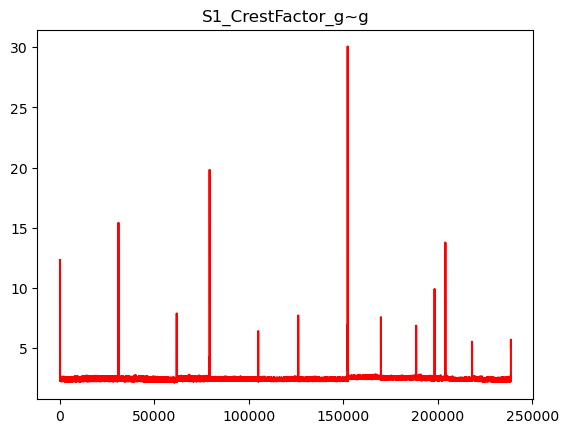

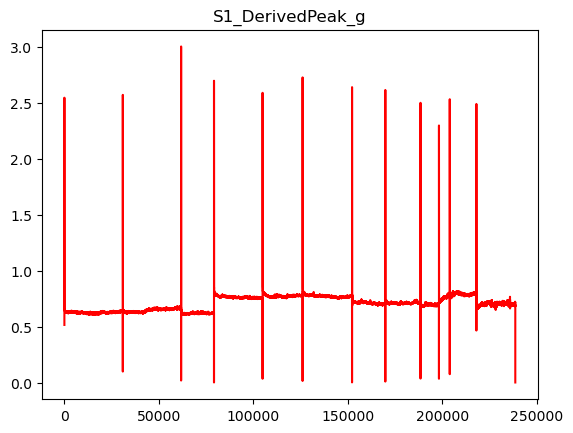

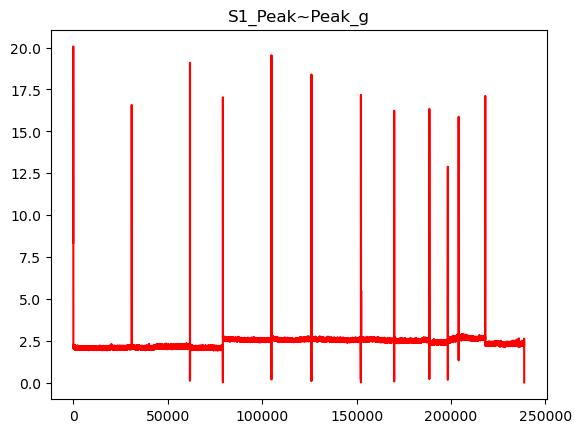

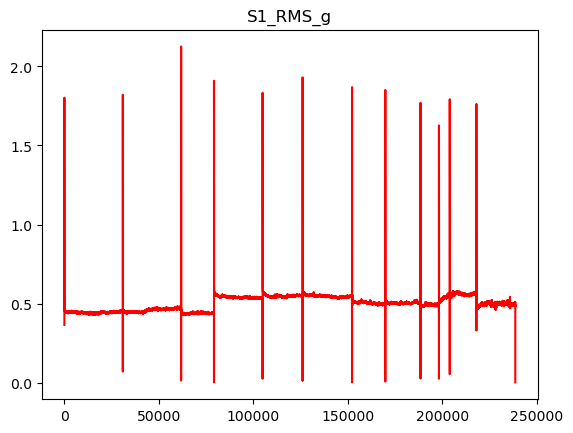

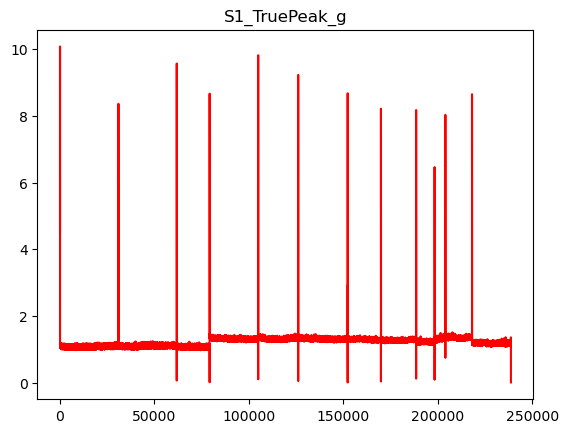

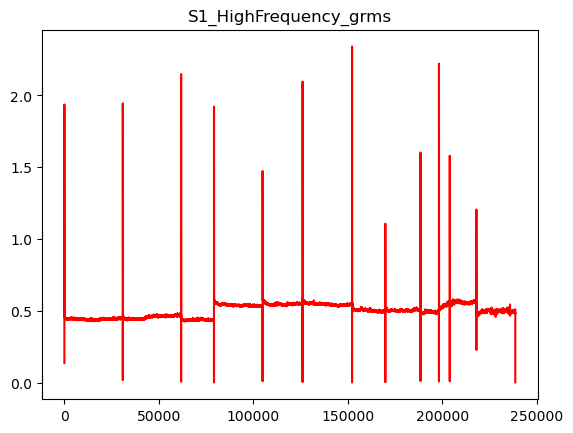

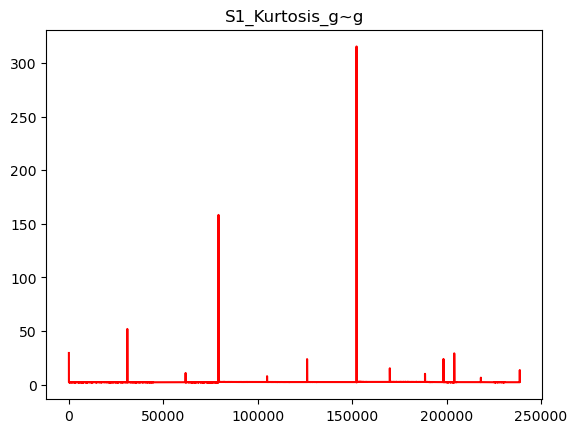

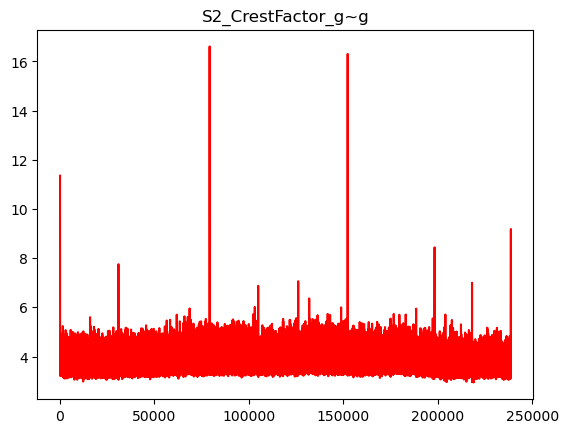

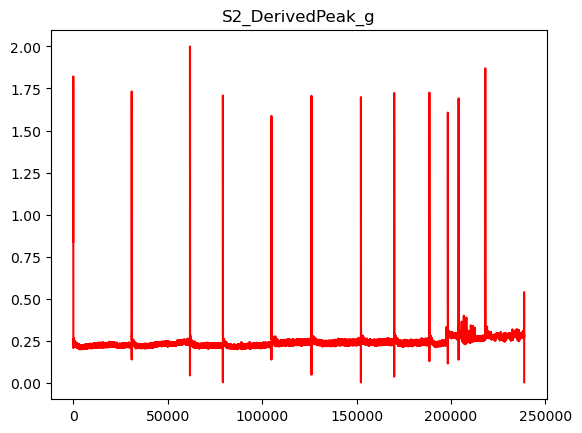

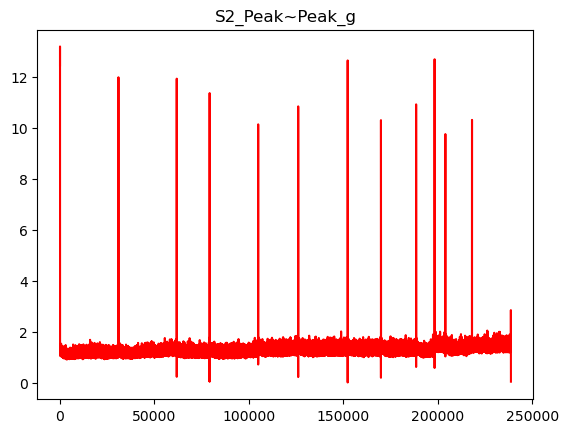

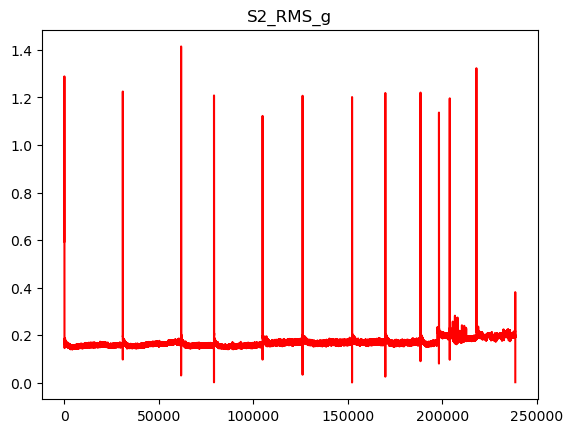

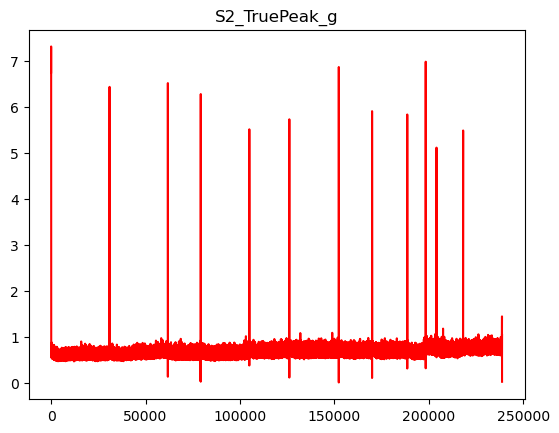

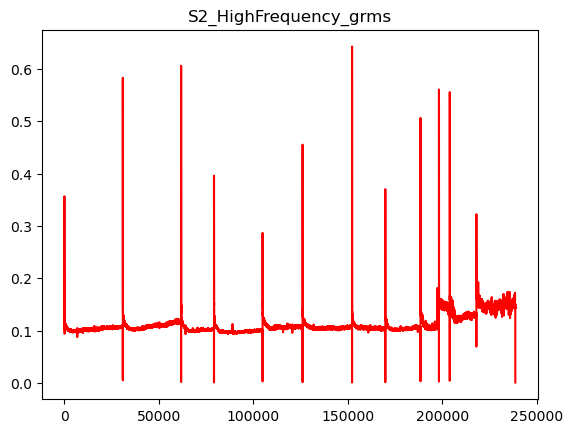

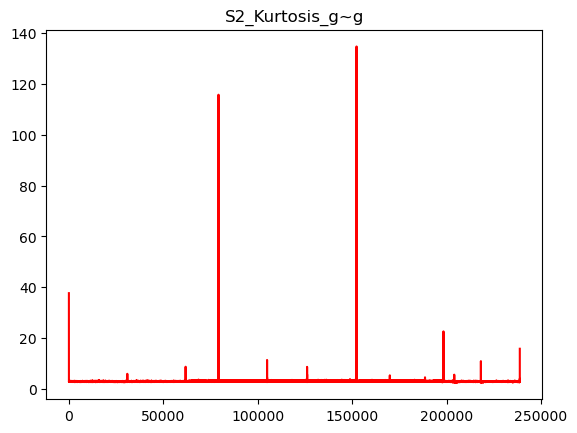

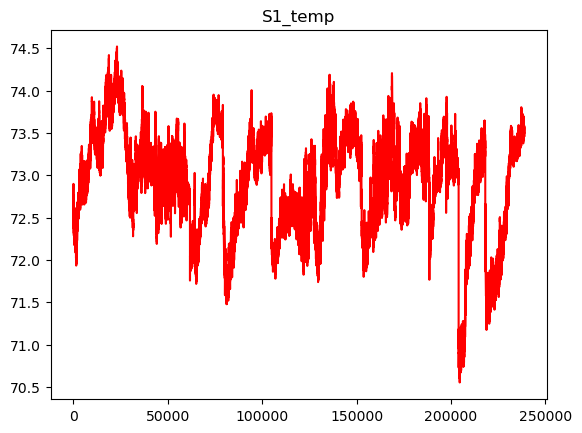

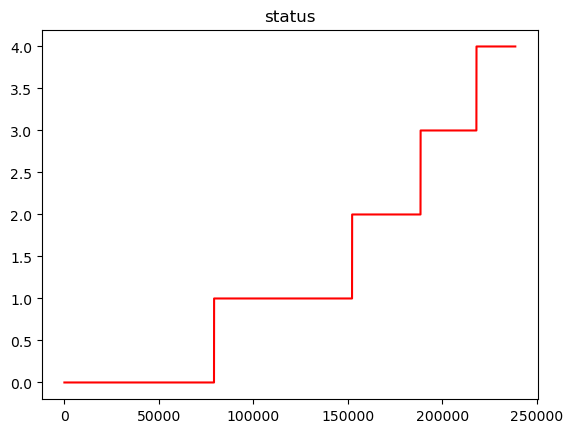

In [27]:

for i in df.columns[:-1]:

    y=df[[i]].values



    x = range(0,len(y))

    plt.title("Line graph")
    plt.plot(x, y, color="red")
    plt.title(str(i))

    plt.show()

In [28]:
from scipy import stats


cols = list(df.columns[:-3])

print(cols)


['S1_CrestFactor_g~g', 'S1_DerivedPeak_g', 'S1_Peak~Peak_g', 'S1_RMS_g', 'S1_TruePeak_g', 'S1_HighFrequency_grms', 'S1_Kurtosis_g~g', 'S2_CrestFactor_g~g', 'S2_DerivedPeak_g', 'S2_Peak~Peak_g', 'S2_RMS_g', 'S2_TruePeak_g', 'S2_HighFrequency_grms', 'S2_Kurtosis_g~g']


# OUTLIERS REMOVAL !!!!!NO LONGER APPLIED!!!!!!!

In [29]:

# df['S1_CrestFactor_g~g'] = df['S1_CrestFactor_g~g'].mask(np.abs(stats.zscore(df['S1_CrestFactor_g~g'])) >= 20)
# df['S1_DerivedPeak_g'] = df['S1_DerivedPeak_g'].mask(np.abs(stats.zscore(df['S1_DerivedPeak_g'])) >= 2)
# df['S1_Peak~Peak_g'] = df['S1_Peak~Peak_g'].mask(np.abs(stats.zscore(df['S1_Peak~Peak_g'])) >= 15)
# df['S1_RMS_g'] = df['S1_RMS_g'].mask(np.abs(stats.zscore(df['S1_RMS_g'])) >= 1)
# df['S1_TruePeak_g'] = df['S1_TruePeak_g'].mask(np.abs(stats.zscore(df['S1_TruePeak_g'])) >= 4)
# df['S1_HighFrequency_grms'] = df['S1_HighFrequency_grms'].mask(np.abs(stats.zscore(df['S1_HighFrequency_grms'])) >= 1.5)
# df['S1_Kurtosis_g~g'] = df['S1_Kurtosis_g~g'].mask(np.abs(stats.zscore(df['S1_Kurtosis_g~g'])) >= 50)
# df['S2_CrestFactor_g~g'] = df['S2_CrestFactor_g~g'].mask(np.abs(stats.zscore(df['S2_CrestFactor_g~g'])) >= 8)
# df['S2_DerivedPeak_g'] = df['S2_DerivedPeak_g'].mask(np.abs(stats.zscore(df['S2_DerivedPeak_g'])) >= 1)
# df['S2_Peak~Peak_g'] = df['S2_Peak~Peak_g'].mask(np.abs(stats.zscore(df['S2_Peak~Peak_g'])) >= 6)
# df['S2_RMS_g'] = df['S2_RMS_g'].mask(np.abs(stats.zscore(df['S2_RMS_g'])) >= 0.6)
# df['S2_TruePeak_g'] = df['S2_TruePeak_g'].mask(np.abs(stats.zscore(df['S2_TruePeak_g'])) >= 3)
# df['S2_HighFrequency_grms'] = df['S2_HighFrequency_grms'].mask(np.abs(stats.zscore(df['S2_HighFrequency_grms'])) >= 0.50)
# df['S2_Kurtosis_g~g'] = df['S2_Kurtosis_g~g'].mask(np.abs(stats.zscore(df['S2_Kurtosis_g~g'])) >= 20)



In [30]:
df = df.apply (pd.to_numeric, errors='coerce')
df = df.dropna()

In [31]:
df

,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status,rul
0,12.3214,0.5170,8.3688,0.3655,4.5040,0.1355,29.4402,11.3516,0.8401,12.4549,0.5941,6.7436,0.1040,37.6491,72.4676,0,2009308.0
1,5.5933,2.5483,20.0644,1.8019,10.0786,1.9368,8.9174,5.6735,1.8216,13.1957,1.2881,7.3079,0.2197,5.0971,72.4427,0,2009307.0
2,4.0140,2.5484,14.3660,1.8020,7.2333,1.6188,5.0306,7.7328,1.2040,11.7569,0.8513,6.5833,0.3566,12.4059,72.4770,0,2009306.0
3,2.6487,0.6943,2.5795,0.4910,1.3004,0.4809,2.2368,3.7461,0.2835,1.4845,0.2004,0.7508,0.1578,2.8937,72.4549,0,2009305.0
4,2.5022,0.6752,2.3616,0.4774,1.1946,0.4748,2.2111,3.7041,0.2932,1.4761,0.2073,0.7679,0.1620,2.7997,72.4988,0,2009304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238717,2.5083,0.6880,2.3624,0.4865,1.2203,0.4834,2.1624,3.5082,0.2728,1.2713,0.1929,0.6767,0.1447,2.7364,73.5386,4,21.0
238718,2.3925,0.6879,2.2706,0.4864,1.1638,0.4837,2.1555,3.2138,0.2856,1.2836,0.2020,0.6491,0.1457,2.7667,73.5767,4,20.0
238719,5.7067,0.2556,2.0422,0.1808,1.0315,0.0308,13.5090,5.3715,0.1918,1.3841,0.1356,0.7285,0.0184,3.9787,73.5347,4,19.0
238720,4.2261,0.0406,0.2402,0.0287,0.1215,0.0115,3.1910,4.3151,0.1361,0.7445,0.0963,0.4154,0.0036,3.2765,73.5728,4,18.0


In [32]:
# Get X & y
# Naming convention: X as predictors; y as response.
from sklearn.model_selection import train_test_split

y = df[['status','rul']] # pop response




X = df.drop('rul',axis = 1) # drop response

print (X.shape)
print (X.columns)

(238722, 16)
Index(['S1_CrestFactor_g~g', 'S1_DerivedPeak_g', 'S1_Peak~Peak_g', 'S1_RMS_g',
       'S1_TruePeak_g', 'S1_HighFrequency_grms', 'S1_Kurtosis_g~g',
       'S2_CrestFactor_g~g', 'S2_DerivedPeak_g', 'S2_Peak~Peak_g', 'S2_RMS_g',
       'S2_TruePeak_g', 'S2_HighFrequency_grms', 'S2_Kurtosis_g~g', 'S1_temp',
       'status'],
      dtype='object')


# FAKE SPLIT TO REUSE CODE

ALL DATA IS KEPT UNDER THE TRAINING DATA VARIABLE. THIS INFO IS FIRST TRANSFORMED INTO SERIES OF 3 DIMENSIONAL ARRAYS AND THEN SPLIT IT BY A TRAIN_TEST_SPLIT

In [33]:
## true orignal ones
# data split

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.001, shuffle = False, random_state = RNDSEED)

# Use the same function above for the validation set
X_train, X_vals, y_train, y_vals = train_test_split(X_train, y_train,
    test_size=0.001, random_state= RNDSEED,shuffle=False) # 0.25 x 0.8 = 0.2




In [34]:
df

,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status,rul
0,12.3214,0.5170,8.3688,0.3655,4.5040,0.1355,29.4402,11.3516,0.8401,12.4549,0.5941,6.7436,0.1040,37.6491,72.4676,0,2009308.0
1,5.5933,2.5483,20.0644,1.8019,10.0786,1.9368,8.9174,5.6735,1.8216,13.1957,1.2881,7.3079,0.2197,5.0971,72.4427,0,2009307.0
2,4.0140,2.5484,14.3660,1.8020,7.2333,1.6188,5.0306,7.7328,1.2040,11.7569,0.8513,6.5833,0.3566,12.4059,72.4770,0,2009306.0
3,2.6487,0.6943,2.5795,0.4910,1.3004,0.4809,2.2368,3.7461,0.2835,1.4845,0.2004,0.7508,0.1578,2.8937,72.4549,0,2009305.0
4,2.5022,0.6752,2.3616,0.4774,1.1946,0.4748,2.2111,3.7041,0.2932,1.4761,0.2073,0.7679,0.1620,2.7997,72.4988,0,2009304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238717,2.5083,0.6880,2.3624,0.4865,1.2203,0.4834,2.1624,3.5082,0.2728,1.2713,0.1929,0.6767,0.1447,2.7364,73.5386,4,21.0
238718,2.3925,0.6879,2.2706,0.4864,1.1638,0.4837,2.1555,3.2138,0.2856,1.2836,0.2020,0.6491,0.1457,2.7667,73.5767,4,20.0
238719,5.7067,0.2556,2.0422,0.1808,1.0315,0.0308,13.5090,5.3715,0.1918,1.3841,0.1356,0.7285,0.0184,3.9787,73.5347,4,19.0
238720,4.2261,0.0406,0.2402,0.0287,0.1215,0.0115,3.1910,4.3151,0.1361,0.7445,0.0963,0.4154,0.0036,3.2765,73.5728,4,18.0


# Lets Take a Look to the data!

In [35]:
y_train=pd.DataFrame(y_train,columns = df.columns[-2:])
y_vals=pd.DataFrame(y_vals,columns = df.columns[-2:])
y_test=pd.DataFrame(y_test,columns = df.columns[-2:])

In [36]:
X_train

,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status
0,12.3214,0.5170,8.3688,0.3655,4.5040,0.1355,29.4402,11.3516,0.8401,12.4549,0.5941,6.7436,0.1040,37.6491,72.4676,0
1,5.5933,2.5483,20.0644,1.8019,10.0786,1.9368,8.9174,5.6735,1.8216,13.1957,1.2881,7.3079,0.2197,5.0971,72.4427,0
2,4.0140,2.5484,14.3660,1.8020,7.2333,1.6188,5.0306,7.7328,1.2040,11.7569,0.8513,6.5833,0.3566,12.4059,72.4770,0
3,2.6487,0.6943,2.5795,0.4910,1.3004,0.4809,2.2368,3.7461,0.2835,1.4845,0.2004,0.7508,0.1578,2.8937,72.4549,0
4,2.5022,0.6752,2.3616,0.4774,1.1946,0.4748,2.2111,3.7041,0.2932,1.4761,0.2073,0.7679,0.1620,2.7997,72.4988,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238239,2.3484,0.7049,2.3056,0.4985,1.1706,0.4984,2.1560,3.7048,0.2853,1.4410,0.2017,0.7473,0.1556,2.7833,73.4316,4
238240,2.3505,0.7039,2.3207,0.4977,1.1699,0.4965,2.1556,3.3104,0.2844,1.2911,0.2011,0.6657,0.1544,2.7310,73.4484,4
238241,2.4693,0.7040,2.3776,0.4978,1.2292,0.4957,2.1611,3.5026,0.2870,1.4054,0.2030,0.7109,0.1553,2.7390,73.5186,4
238242,2.3349,0.7011,2.3051,0.4957,1.1574,0.4940,2.1562,3.6600,0.2774,1.3829,0.1961,0.7178,0.1519,2.7795,73.4626,4


# LSTM

In [37]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.layers import Dropout,Conv1D,MaxPooling1D,Flatten, Activation, Dense
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from datetime import datetime
from tensorflow.keras.layers import Dropout,Conv1D,MaxPooling1D,Flatten, Activation
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# from autosklearn.regression import AutoSklearnRegressor
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.regularizers import L2,L1,L1L2

2023-06-19 23:52:46.412382: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-19 23:52:47.129267: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [38]:
X_train#.shape

,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status
0,12.3214,0.5170,8.3688,0.3655,4.5040,0.1355,29.4402,11.3516,0.8401,12.4549,0.5941,6.7436,0.1040,37.6491,72.4676,0
1,5.5933,2.5483,20.0644,1.8019,10.0786,1.9368,8.9174,5.6735,1.8216,13.1957,1.2881,7.3079,0.2197,5.0971,72.4427,0
2,4.0140,2.5484,14.3660,1.8020,7.2333,1.6188,5.0306,7.7328,1.2040,11.7569,0.8513,6.5833,0.3566,12.4059,72.4770,0
3,2.6487,0.6943,2.5795,0.4910,1.3004,0.4809,2.2368,3.7461,0.2835,1.4845,0.2004,0.7508,0.1578,2.8937,72.4549,0
4,2.5022,0.6752,2.3616,0.4774,1.1946,0.4748,2.2111,3.7041,0.2932,1.4761,0.2073,0.7679,0.1620,2.7997,72.4988,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238239,2.3484,0.7049,2.3056,0.4985,1.1706,0.4984,2.1560,3.7048,0.2853,1.4410,0.2017,0.7473,0.1556,2.7833,73.4316,4
238240,2.3505,0.7039,2.3207,0.4977,1.1699,0.4965,2.1556,3.3104,0.2844,1.2911,0.2011,0.6657,0.1544,2.7310,73.4484,4
238241,2.4693,0.7040,2.3776,0.4978,1.2292,0.4957,2.1611,3.5026,0.2870,1.4054,0.2030,0.7109,0.1553,2.7390,73.5186,4
238242,2.3349,0.7011,2.3051,0.4957,1.1574,0.4940,2.1562,3.6600,0.2774,1.3829,0.1961,0.7178,0.1519,2.7795,73.4626,4


In [39]:
# X_train.shape
# np.c_[m, v]
X_train

,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status
0,12.3214,0.5170,8.3688,0.3655,4.5040,0.1355,29.4402,11.3516,0.8401,12.4549,0.5941,6.7436,0.1040,37.6491,72.4676,0
1,5.5933,2.5483,20.0644,1.8019,10.0786,1.9368,8.9174,5.6735,1.8216,13.1957,1.2881,7.3079,0.2197,5.0971,72.4427,0
2,4.0140,2.5484,14.3660,1.8020,7.2333,1.6188,5.0306,7.7328,1.2040,11.7569,0.8513,6.5833,0.3566,12.4059,72.4770,0
3,2.6487,0.6943,2.5795,0.4910,1.3004,0.4809,2.2368,3.7461,0.2835,1.4845,0.2004,0.7508,0.1578,2.8937,72.4549,0
4,2.5022,0.6752,2.3616,0.4774,1.1946,0.4748,2.2111,3.7041,0.2932,1.4761,0.2073,0.7679,0.1620,2.7997,72.4988,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238239,2.3484,0.7049,2.3056,0.4985,1.1706,0.4984,2.1560,3.7048,0.2853,1.4410,0.2017,0.7473,0.1556,2.7833,73.4316,4
238240,2.3505,0.7039,2.3207,0.4977,1.1699,0.4965,2.1556,3.3104,0.2844,1.2911,0.2011,0.6657,0.1544,2.7310,73.4484,4
238241,2.4693,0.7040,2.3776,0.4978,1.2292,0.4957,2.1611,3.5026,0.2870,1.4054,0.2030,0.7109,0.1553,2.7390,73.5186,4
238242,2.3349,0.7011,2.3051,0.4957,1.1574,0.4940,2.1562,3.6600,0.2774,1.3829,0.1961,0.7178,0.1519,2.7795,73.4626,4


0         0.000000
1         0.000004
2         0.000008
3         0.000013
4         0.000017
            ...   
238239    0.999983
238240    0.999987
238241    0.999992
238242    0.999996
238243    1.000000
Name: rul, Length: 238244, dtype: float64
range(0, 238244)


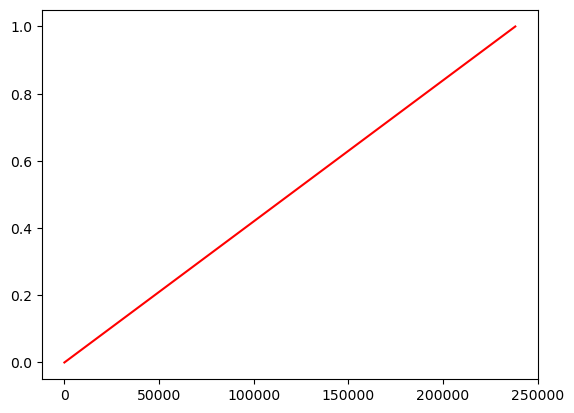

In [40]:
from sklearn.preprocessing import StandardScaler
from scipy.signal import medfilt
import pandas as pd
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))



scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns = df.columns[:-1])




model = np.poly1d(np.polyfit(range(0,len(y_train['rul'])), y_train['rul'], 1))
polyline = np.array(np.linspace(0,len(y_train['rul']),len(y_train['rul']) ) )

## Using Oldest - current to determine the RUL
y_train['rul'] = NormalizeData(polyline)
#ADDING A FILTER TO SMOOTHEN CURVE
plt.plot( range(0,len(y_train['rul'])),y_train['rul'] ,color='red')


print(y_train['rul'] )
print(range(0,len(y_train['rul'])))

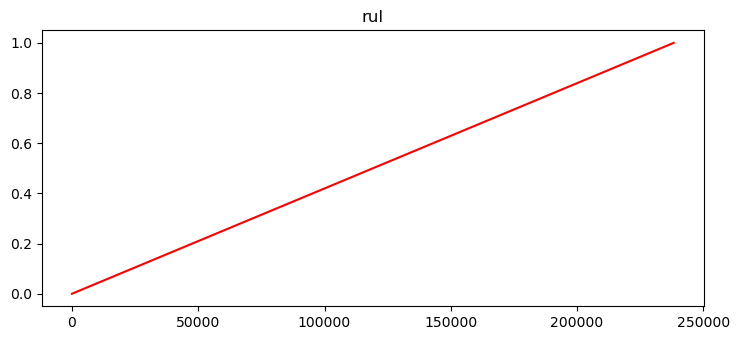

In [41]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.title("Line graph")
plt.title("rul")
plt.plot(range(0,len(y_train['rul'])),y_train['rul'], color="red")





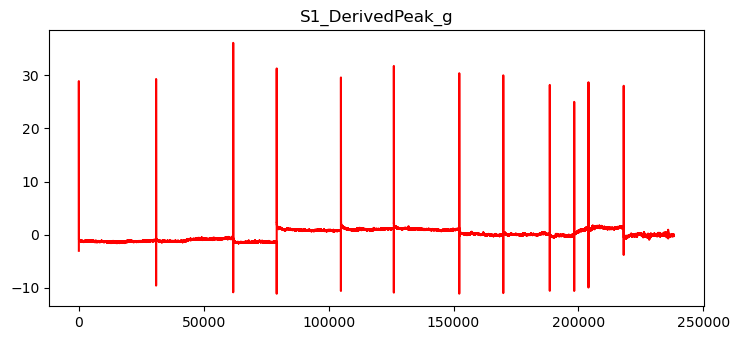

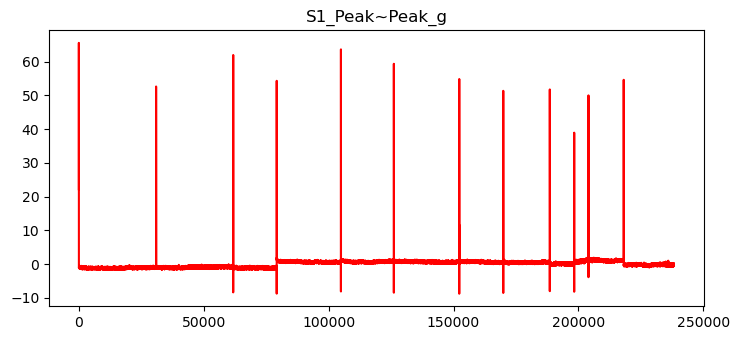

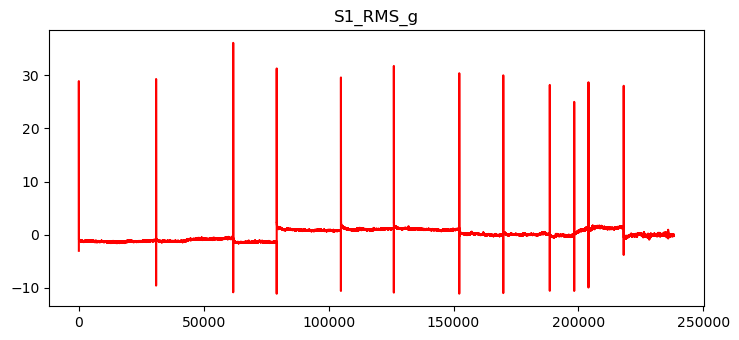

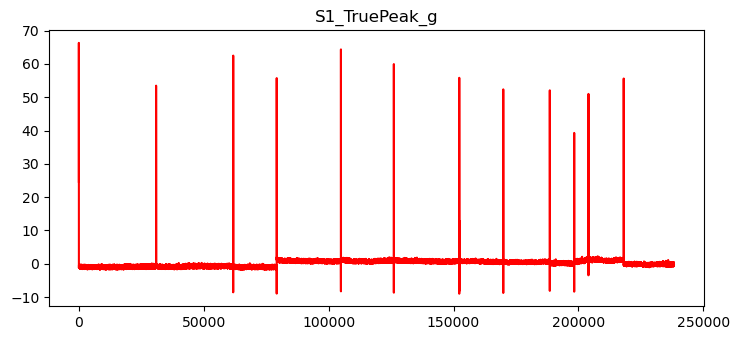

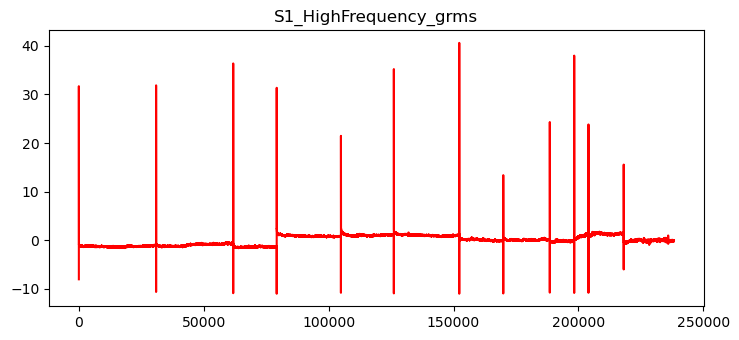

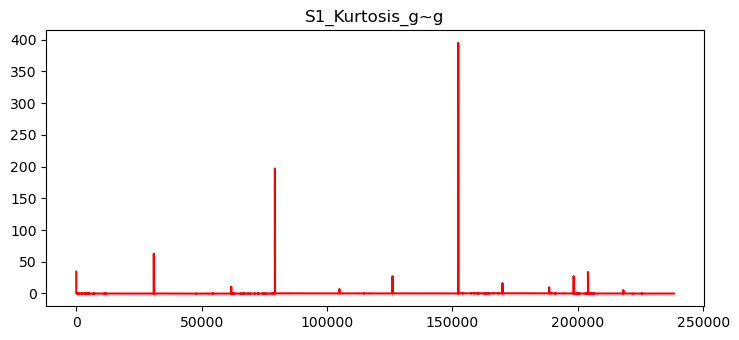

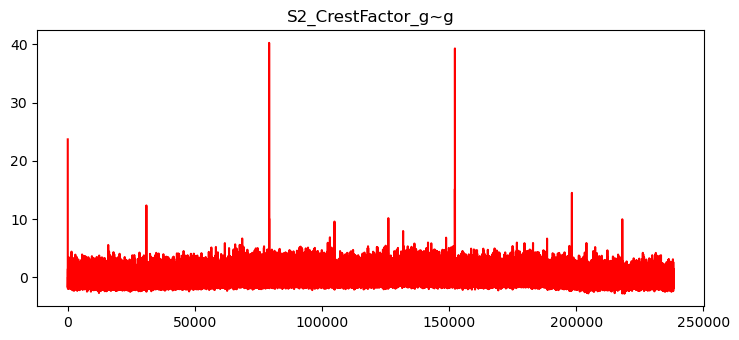

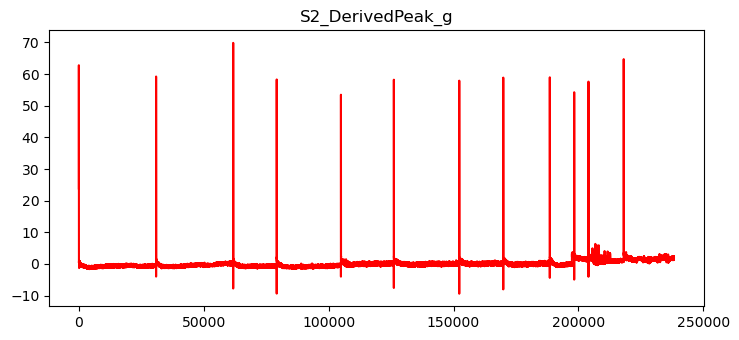

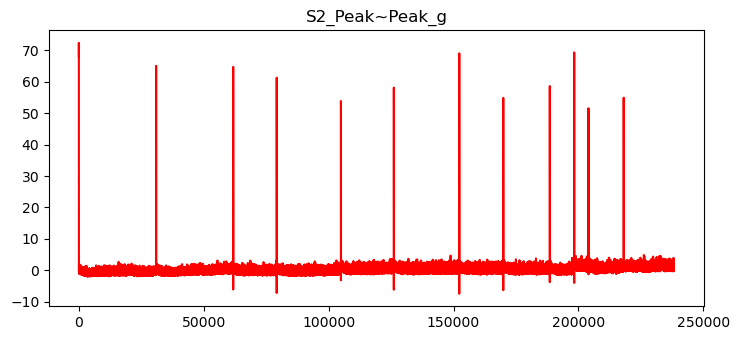

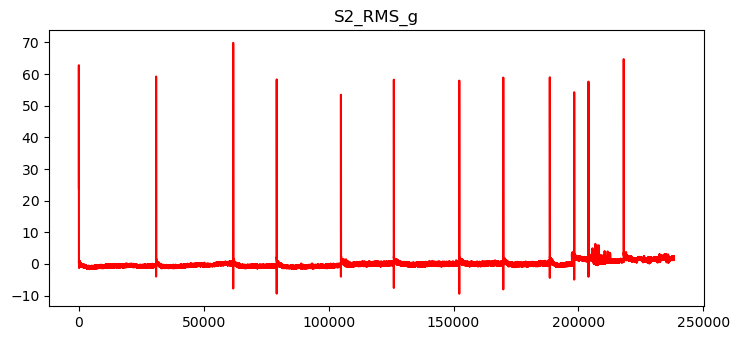

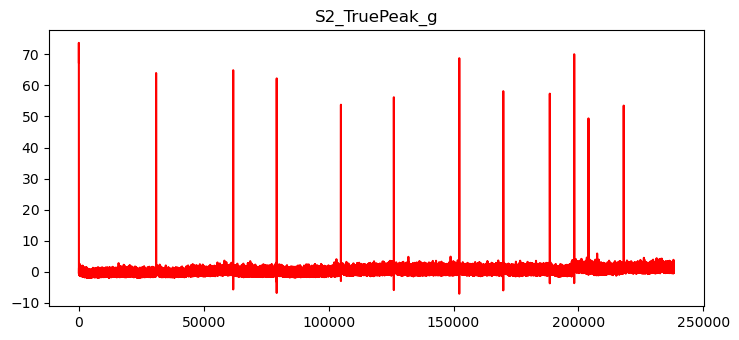

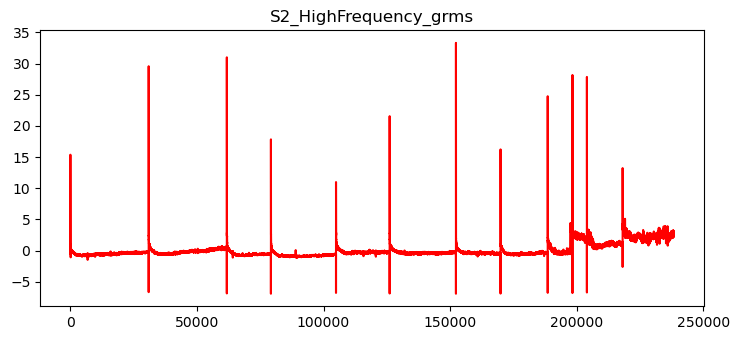

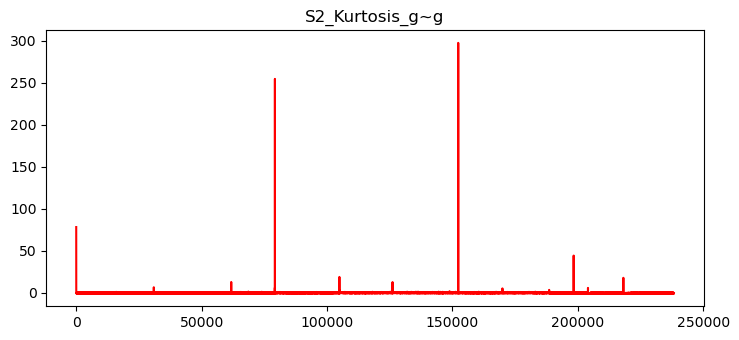

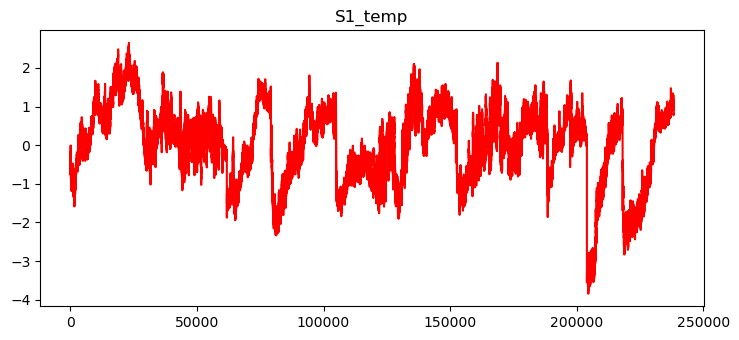

In [42]:

for i in X_train.columns[1:-1]:

    y=X_train[[i]].values



    x = range(0,len(y))

    plt.title("Line graph")
    plt.plot(x, y, color="red")
    plt.title(str(i))

    plt.show()

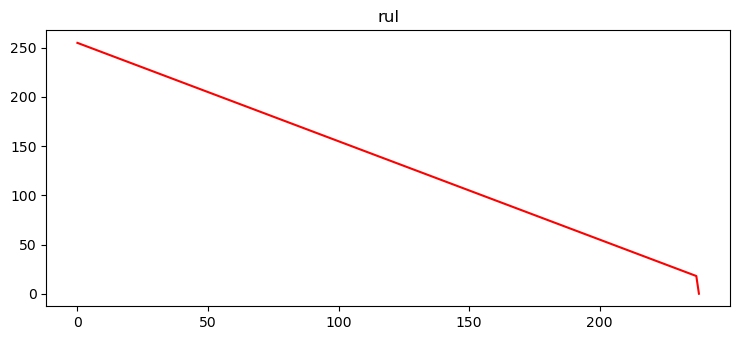

In [43]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.title("Line graph")
plt.title("rul")
plt.plot(range(0,len(y_test['rul'])),y_test['rul'], color="red")





# SEQUENCE LEGHT

In [44]:
seq_length=200
#STEPS_PER_BATCH=#X_vals.shape[0] IF 60 MINS OF DATA THEN 3600


###### LSTMs and Sequences:
LSTM models need 3 dimentional inputs (number of data rows, sequence_length, number of features). This because we need the LSTM to take a sequence of data (for example 200 secs of data) and from this sequence, we want the LSTM model to predict the RUL. These 3 inputs provide the LSTM model all the information about the tendancies and variations in the data for this period, which gives the LSTM model an idea about the state of the motor. This is a strength of LSTM models. They take a degradation period of the motor and determines how much the motor has degraded (percent of life left or RUL as a percent).

For this RUL model we will take 200 seconds of data (sequence_length = 200). We can take more if we desire, but the more data we take the longer the computation time will be.

In [45]:
def gen_seq(data, seq_length, columns):
    L=[]
    n = data.shape[0]
    for i in range(0, n - seq_length):
        L.append(data[i:i+seq_length][columns].values)
    return(L)

###### Homogeneity of Sequences:
For LSTM models, the sequences should be homogeneous. To accomplish this, we generate the sequences depending on the status. We split each status to into sequences, and then join them into one array in the cells below (for train and test datasets).

(data, seq_length, columns):

data = train_data[train_data['status'] == id

seq_length = 200

columns = [... tabular columns...,"status"]

In [46]:
#INCLUSION OF STATUS

In [47]:
columns=df.columns[:-2]
columns

Index(['S1_CrestFactor_g~g', 'S1_DerivedPeak_g', 'S1_Peak~Peak_g', 'S1_RMS_g',
       'S1_TruePeak_g', 'S1_HighFrequency_grms', 'S1_Kurtosis_g~g',
       'S2_CrestFactor_g~g', 'S2_DerivedPeak_g', 'S2_Peak~Peak_g', 'S2_RMS_g',
       'S2_TruePeak_g', 'S2_HighFrequency_grms', 'S2_Kurtosis_g~g', 'S1_temp'],
      dtype='object')

In [48]:
columns.shape

(15,)

In [49]:
target=df.columns[-1]
target

'rul'

In [50]:
X_train.shape

(238244, 16)

In [51]:
X_train

,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status
0,73.740707,-3.026359,22.219073,-3.028011,24.615745,-8.041372,34.278640,23.682092,23.850742,67.913348,23.854127,67.459358,-0.461781,78.385604,-0.712209,-1.032459
1,23.641307,28.884864,65.579225,28.884447,66.318186,31.694392,8.397912,5.800568,62.775967,72.401607,62.778011,73.702569,6.793609,4.958206,-0.752972,-1.032459
2,11.881378,28.886435,44.453034,28.886669,45.033079,24.679474,3.496377,12.285734,38.282621,63.684400,38.279520,65.685856,15.378423,21.444633,-0.696820,-1.032459
3,1.714955,-0.241019,0.755880,-0.239781,0.650269,-0.422023,-0.026806,-0.269218,1.776589,1.447375,1.772955,1.157183,2.911944,-0.011993,-0.732999,-1.032459
4,0.624073,-0.541076,-0.051961,-0.541932,-0.141200,-0.556586,-0.059216,-0.401485,2.161281,1.396482,2.159950,1.346371,3.175321,-0.224029,-0.661132,-1.032459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238239,-0.521167,-0.074496,-0.259575,-0.073154,-0.320739,-0.035982,-0.128701,-0.399280,1.847975,1.183823,1.845867,1.118460,2.773985,-0.261022,0.865932,2.092788
238240,-0.505529,-0.090206,-0.203593,-0.090928,-0.325975,-0.077895,-0.129205,-1.641328,1.812282,0.275629,1.812215,0.215667,2.698735,-0.378995,0.893435,2.092788
238241,0.379090,-0.088635,0.007358,-0.088706,0.117636,-0.095543,-0.122269,-1.036050,1.915395,0.968135,1.918779,0.715744,2.755173,-0.360949,1.008358,2.092788
238242,-0.621692,-0.134193,-0.261428,-0.135361,-0.419485,-0.133044,-0.128448,-0.540365,1.534670,0.831815,1.531784,0.792083,2.541963,-0.269594,0.916682,2.092788


In [52]:
## Dr. Li's comment:: This step is very inefficient
##
train_inputs = np.concatenate(np.array([gen_seq(X_train[X_train['status'] == id], seq_length, columns)
                               for id in X_train['status'].unique()]))

/tmp/ipykernel_129211/1391934017.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_inputs = np.concatenate(np.array([gen_seq(X_train[X_train['status'] == id], seq_length, columns)


In [53]:
train_inputs.shape

(237244, 200, 15)

In [54]:
train_inputs

array([[[ 7.37407071e+01, -3.02635889e+00,  2.22190734e+01, ...,
         -4.61780690e-01,  7.83856039e+01, -7.12208598e-01],
        [ 2.36413075e+01,  2.88848645e+01,  6.55792255e+01, ...,
          6.79360948e+00,  4.95820596e+00, -7.52971781e-01],
        [ 1.18813779e+01,  2.88864354e+01,  4.44530335e+01, ...,
          1.53784229e+01,  2.14446328e+01, -6.96820088e-01],
        ...,
        [-3.29052276e-01, -9.82519888e-01, -8.74630534e-01, ...,
          1.84118349e-01, -9.07171420e-02, -5.91719833e-01],
        [-9.44940670e-02, -9.87232814e-01, -7.03719848e-01, ...,
          2.28014400e-01, -1.35723580e-02, -5.84680408e-01],
        [ 3.57495879e-01, -9.93516716e-01, -9.54710161e-01, ...,
          1.96660078e-01, -2.80646698e-01, -7.08115909e-01]],

       [[ 2.36413075e+01,  2.88848645e+01,  6.55792255e+01, ...,
          6.79360948e+00,  4.95820596e+00, -7.52971781e-01],
        [ 1.18813779e+01,  2.88864354e+01,  4.44530335e+01, ...,
          1.53784229e+01,  2.14446328e

In [55]:

test_inputs = np.concatenate(np.array([gen_seq(X_test[X_test['status'] == id], seq_length, columns)
                               for id in X_test['status'].unique()]))

In [56]:
test_inputs.shape

(39, 200, 15)

In [57]:

vals_inputs = np.concatenate(np.array([gen_seq(X_vals[X_vals['status'] == id], seq_length, columns)
                               for id in X_vals['status'].unique()]))

In [58]:
vals_inputs.shape

(39, 200, 15)

In [59]:
def gen_labels(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length:num_elements]

In [60]:
train_out = np.concatenate(np.array([gen_labels(y_train[y_train['status'] == id], seq_length, [target])
                               for id in y_train['status'].unique()]))

/tmp/ipykernel_129211/3860507962.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_out = np.concatenate(np.array([gen_labels(y_train[y_train['status'] == id], seq_length, [target])


In [61]:
train_out.shape


(237244, 1)

In [62]:
test_out = np.concatenate(np.array([gen_labels(y_test[y_test['status'] == id], seq_length, [target])
                               for id in y_test['status'].unique()]))

In [63]:
test_out.shape

(39, 1)

In [64]:
vals_out = np.concatenate(np.array([gen_labels(y_vals[y_vals['status'] == id], seq_length, [target])
                               for id in y_vals['status'].unique()]))

In [65]:
vals_out.shape

(39, 1)

# New split based on randomized sequences!

In [66]:
train_inputs.shape

(237244, 200, 15)

In [67]:
train_inputs

array([[[ 7.37407071e+01, -3.02635889e+00,  2.22190734e+01, ...,
         -4.61780690e-01,  7.83856039e+01, -7.12208598e-01],
        [ 2.36413075e+01,  2.88848645e+01,  6.55792255e+01, ...,
          6.79360948e+00,  4.95820596e+00, -7.52971781e-01],
        [ 1.18813779e+01,  2.88864354e+01,  4.44530335e+01, ...,
          1.53784229e+01,  2.14446328e+01, -6.96820088e-01],
        ...,
        [-3.29052276e-01, -9.82519888e-01, -8.74630534e-01, ...,
          1.84118349e-01, -9.07171420e-02, -5.91719833e-01],
        [-9.44940670e-02, -9.87232814e-01, -7.03719848e-01, ...,
          2.28014400e-01, -1.35723580e-02, -5.84680408e-01],
        [ 3.57495879e-01, -9.93516716e-01, -9.54710161e-01, ...,
          1.96660078e-01, -2.80646698e-01, -7.08115909e-01]],

       [[ 2.36413075e+01,  2.88848645e+01,  6.55792255e+01, ...,
          6.79360948e+00,  4.95820596e+00, -7.52971781e-01],
        [ 1.18813779e+01,  2.88864354e+01,  4.44530335e+01, ...,
          1.53784229e+01,  2.14446328e

In [68]:

# set aside 20% of train and test data for evaluation HERE WE SHUFFLE OUR SEQUENCES
train_inputs, test_inputs, train_out, test_out = train_test_split(train_inputs, train_out,
    test_size=0.25, shuffle = True, random_state = RNDSEED)

# Use the same function above for the validation set WE JUST SPLIT IT IN 0.25 and 0.75 OF THE PREVIOUS SPLIT
train_inputs, vals_inputs, train_out, vals_out = train_test_split(train_inputs, train_out,
    test_size=0.25,shuffle=False, random_state= RNDSEED) # 0.25 x 0.8 = 0.2



In [69]:
train_inputs.shape

(133449, 200, 15)

In [70]:
train_inputs

array([[[-2.24059554e-01,  9.56063759e-01,  6.21301387e-01, ...,
         -4.86864147e-01,  3.17789302e-01,  3.97237547e-01],
        [ 3.85791790e-01,  9.52921808e-01,  7.34747525e-01, ...,
         -4.24155503e-01, -9.96324534e-03,  4.83675140e-01],
        [ 5.81549263e-02,  9.90625218e-01,  8.61540268e-01, ...,
         -4.42968096e-01,  1.98914152e-01,  4.65831016e-01],
        ...,
        [-9.88049150e-01,  9.18360349e-01,  2.70953019e-01, ...,
         -4.99405876e-01,  9.13174798e-02,  6.25937011e-01],
        [ 7.60260280e-02,  9.52921808e-01,  7.56621127e-01, ...,
         -3.99072045e-01,  2.91172096e-01,  5.77970696e-01],
        [ 1.95166706e-01,  9.19931325e-01,  6.83585541e-01, ...,
         -4.86864147e-01,  2.91623235e-01,  6.16933095e-01]],

       [[ 1.22937670e-01, -1.21973717e+00, -1.04999009e+00, ...,
         -4.99405876e-01, -2.55608479e-01,  1.50079022e+00],
        [ 2.16680938e-02, -1.23701790e+00, -1.11449868e+00, ...,
         -4.49238961e-01, -5.25958891e

In [71]:
test_inputs

array([[[-1.57787552e-01,  9.74915464e-01,  8.42261839e-01, ...,
         -3.36363401e-01,  1.50867839e-01, -1.15863912e+00],
        [ 4.93018400e-01,  9.30928152e-01,  7.92953550e-01, ...,
         -3.42634265e-01,  3.01322725e-01, -1.18630570e+00],
        [ 3.75366981e-01,  9.52921808e-01,  1.08657885e+00, ...,
         -3.61446858e-01,  2.85983996e-01, -1.12115009e+00],
        ...,
        [ 2.29419651e-01,  8.66518161e-01,  7.14727618e-01, ...,
         -5.18218470e-01, -4.40242465e-02, -8.52997101e-01],
        [-6.06798981e-01,  9.26215226e-01,  4.64849523e-01, ...,
         -5.18218470e-01, -1.26700799e-02, -8.77062113e-01],
        [ 1.72003184e-02,  9.15218398e-01,  6.68014503e-01, ...,
         -4.05342909e-01,  5.86098960e-02, -8.95397360e-01]],

       [[-1.31725529e-01,  9.74915464e-01,  7.05088404e-01, ...,
         -3.61446858e-01, -1.61094840e-01,  8.59579589e-03],
        [-3.74474660e-01,  1.02675765e+00,  6.12032911e-01, ...,
         -3.17550807e-01,  1.10265322e

# Scheduler

In [72]:

# !rm -rf logs/fit/*
# !rm -rf /home/jose/FL_AM_Defect-Detection/checkpoint/RUL16LSTM/*
from  datetime import datetime

In [73]:
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
print(log_dir)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

es=EarlyStopping(
    monitor="val_loss",

    patience=200,
    verbose=1,
    mode="auto",
    min_delta=0.0001
)

filepath=path+'/checkpoint/RUL16LSTM/'+"weights-improvement_BEST.h5"

# fname = os.path.sep.join([filepath,args["weights"],"weights-{epoch:03d}-{val_loss:.4f}.h5"])

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor='val_mae',

    mode='min',
    save_best_only=True, verbose=1)




logs/fit/20230619-235403


Special Tensorboard!

In [74]:
%load_ext tensorboard
%reload_ext tensorboard

In [75]:
%tensorboard — logdir logs

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2023-06-19 23:54:05.808081: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: tensorboard [-h] [--helpfull] {serve,dev} ...
tensorboard: error: argument {serve,dev}: invalid choice: '—' (choose from 'serve', 'dev')

In [76]:

tf.keras.backend.clear_session()

nb_features = train_inputs.shape[2]
sequence_length  = train_inputs.shape[1]
nb_out = train_out.shape[1]

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_shape = (sequence_length, nb_features), return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(nb_out, activation = 'relu')
])

lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 10**-7 * 10**(epoch/3))

model.compile(loss=tf.keras.losses.Huber(), optimizer = tf.keras.optimizers.Adam(lr = 10**-7), metrics =['mse','mae'])




2023-06-19 23:54:08.107949: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30936 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:3b:00.0, compute capability: 7.0
2023-06-19 23:54:08.927788: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-19 23:54:08.928923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/sp

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200, 64)           20480     
                                                                 
 dropout (Dropout)           (None, 200, 64)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 32,929
Trainable params: 32,929
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100


2023-06-19 23:54:13.184427: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-19 23:54:13.185919: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-19 23:54:13.187032: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

4169/4171 [============================>.] - ETA: 0s - loss: 0.1614 - mse: 0.3229 - mae: 0.4838

2023-06-19 23:55:13.323535: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-19 23:55:13.325974: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-19 23:55:13.327011: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus


Epoch 1: val_mae improved from inf to 0.47393, saving model to /home/jose/FL_AM_Defect-Detection/checkpoint/RUL16LSTM/weights-improvement_BEST.h5
4171/4171 [==============================] - 69s 15ms/step - loss: 0.1614 - mse: 0.3229 - mae: 0.4838 - val_loss: 0.1623 - val_mse: 0.3246 - val_mae: 0.4739 - lr: 1.0000e-07
Epoch 2/100
4168/4171 [============================>.] - ETA: 0s - loss: 0.1549 - mse: 0.3097 - mae: 0.4700
Epoch 2: val_mae improved from 0.47393 to 0.46440, saving model to /home/jose/FL_AM_Defect-Detection/checkpoint/RUL16LSTM/weights-improvement_BEST.h5
4171/4171 [==============================] - 60s 14ms/step - loss: 0.1549 - mse: 0.3097 - mae: 0.4699 - val_loss: 0.1534 - val_mse: 0.3067 - val_mae: 0.4644 - lr: 2.1544e-07
Epoch 3/100
4171/4171 [==============================] - ETA: 0s - loss: 0.1170 - mse: 0.2339 - mae: 0.4005
Epoch 3: val_mae improved from 0.46440 to 0.33975, saving model to /home/jose/FL_AM_Defect-Detection/checkpoint/RUL16LSTM/weights-improveme

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4171/4171 [==============================] - ETA: 0s - loss: nan - mse: nan - mae: nan
Epoch 32: val_mae did not improve from 0.01353
4171/4171 [==============================] - 62s 15ms/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan - lr: 2154.4346
Epoch 33/100
4171/4171 [==============================] - ETA: 0s - loss: nan - mse: nan - mae: nan
Epoch 33: val_mae did not improve from 0.01353
4171/4171 [==============================] - 62s 15ms/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan - lr: 4641.5889
Epoch 34/100
4170/4171 [============================>.] - ETA: 0s - loss: nan - mse: nan - mae: nan
Epoch 34: val_mae did not improve from 0.01353
4171/4171 [==============================] - 60s 14ms/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan - lr: 10000.0000
Epoch 35/100
4170/4171 [============================>.] - ETA: 0s - loss: nan - mse: nan - mae: nan
Epoch 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4170/4171 [============================>.] - ETA: 0s - loss: nan - mse: nan - mae: nan
Epoch 48: val_mae did not improve from 0.01353
4171/4171 [==============================] - 61s 15ms/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan - lr: 464158880.0000
Epoch 49/100
4170/4171 [============================>.] - ETA: 0s - loss: nan - mse: nan - mae: nan
Epoch 49: val_mae did not improve from 0.01353
4171/4171 [==============================] - 61s 15ms/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan - lr: 1000000000.0000
Epoch 50/100
4168/4171 [============================>.] - ETA: 0s - loss: nan - mse: nan - mae: nan
Epoch 50: val_mae did not improve from 0.01353
4171/4171 [==============================] - 60s 14ms/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan - lr: 2154434816.0000
Epoch 51/100
4167/4171 [============================>.] - ETA: 0s - loss: nan - mse: nan -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4168/4171 [============================>.] - ETA: 0s - loss: nan - mse: nan - mae: nan
Epoch 81: val_mae did not improve from 0.01353
4171/4171 [==============================] - 60s 14ms/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan - lr: 46415887764610351104.0000
Epoch 82/100
4170/4171 [============================>.] - ETA: 0s - loss: nan - mse: nan - mae: nan
Epoch 82: val_mae did not improve from 0.01353
4171/4171 [==============================] - 60s 14ms/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan - lr: 100000002004087734272.0000
Epoch 83/100
4170/4171 [============================>.] - ETA: 0s - loss: nan - mse: nan - mae: nan
Epoch 83: val_mae did not improve from 0.01353
4171/4171 [==============================] - 59s 14ms/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan - lr: 215443462856940453888.0000
Epoch 84/100
4169/4171 [============================>.] -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4168/4171 [============================>.] - ETA: 0s - loss: nan - mse: nan - mae: nan
Epoch 93: val_mae did not improve from 0.01353
4171/4171 [==============================] - 60s 14ms/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan - lr: 464158883908921742852096.0000
Epoch 94/100
4169/4171 [============================>.] - ETA: 0s - loss: nan - mse: nan - mae: nan
Epoch 94: val_mae did not improve from 0.01353
4171/4171 [==============================] - 60s 14ms/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan - lr: 1000000013848427855085568.0000
Epoch 95/100
4167/4171 [============================>.] - ETA: 0s - loss: nan - mse: nan - mae: nan
Epoch 95: val_mae did not improve from 0.01353
4171/4171 [==============================] - 60s 14ms/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan - lr: 2154434727930071317741568.0000
Epoch 96/100
4171/4171 [=====================

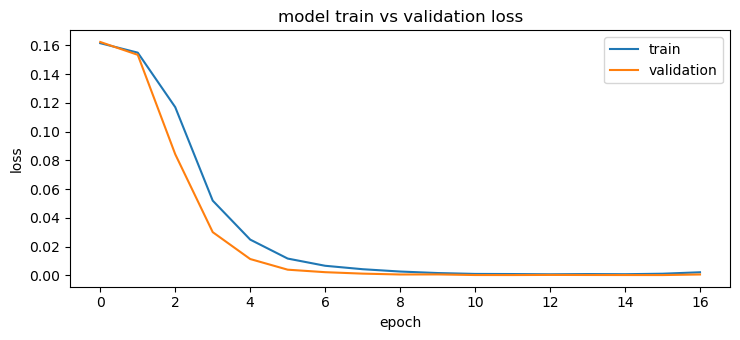

In [78]:
#FAST AI SEE IF TRIANING IMPROVES !
# 1420492
# history = model.fit(train_inputs, train_out, epochs = 20, callbacks = [lr])
history=model.fit(train_inputs,train_out,epochs=100,validation_data= (vals_inputs,vals_out) ,verbose=1,callbacks=[tensorboard_callback,lr,model_checkpoint_callback,es],)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


# No Scheduler

In [79]:
from datetime import datetime
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
print(log_dir)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

es=EarlyStopping(
    monitor="val_loss",

    patience=200,
    verbose=1,
    mode="auto",
    min_delta=0.0001
)

filepath=path+'/checkpoint/RUL16LSTM/'+"weights-improvement_BEST.h5"

# fname = os.path.sep.join([filepath,args["weights"],"weights-{epoch:03d}-{val_loss:.4f}.h5"])

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor='val_mae',

    mode='min',
    save_best_only=True, verbose=1)



logs/fit/20230620-013456


In [80]:
tf.keras.backend.clear_session()

nb_features = train_inputs.shape[2]
sequence_length  = train_inputs.shape[1]
nb_out = train_out.shape[1]

model = tf.keras.models.Sequential([
    # "1"
    tf.keras.layers.LSTM(128, input_shape = (sequence_length, nb_features), return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dropout(0.2),
    #"2"
    tf.keras.layers.Dense(nb_out, activation = 'relu')
])

model.compile(loss=tf.keras.losses.Huber(), optimizer = tf.keras.optimizers.Adam(lr = 0.000001 ), metrics =['mse','mae'])


2023-06-20 01:34:56.983700: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-20 01:34:56.986390: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-20 01:34:56.987415: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [81]:

history = model.fit(train_inputs, train_out, validation_data=(vals_inputs,vals_out), epochs = 150, verbose=1,callbacks=[tensorboard_callback,model_checkpoint_callback,es])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Epoch 1/150


2023-06-20 01:35:02.039558: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-20 01:35:02.041043: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-20 01:35:02.042183: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

4171/4171 [==============================] - ETA: 0s - loss: 0.0019 - mse: 0.0038 - mae: 0.0394

2023-06-20 01:36:13.464189: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-20 01:36:13.466901: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-20 01:36:13.468015: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus


Epoch 1: val_mae improved from inf to 0.03237, saving model to /home/jose/FL_AM_Defect-Detection/checkpoint/RUL16LSTM/weights-improvement_BEST.h5
4171/4171 [==============================] - 82s 19ms/step - loss: 0.0019 - mse: 0.0038 - mae: 0.0394 - val_loss: 0.0012 - val_mse: 0.0023 - val_mae: 0.0324
Epoch 2/150
4171/4171 [==============================] - ETA: 0s - loss: 5.3092e-04 - mse: 0.0011 - mae: 0.0232
Epoch 2: val_mae improved from 0.03237 to 0.01218, saving model to /home/jose/FL_AM_Defect-Detection/checkpoint/RUL16LSTM/weights-improvement_BEST.h5
4171/4171 [==============================] - 74s 18ms/step - loss: 5.3092e-04 - mse: 0.0011 - mae: 0.0232 - val_loss: 2.4278e-04 - val_mse: 4.8555e-04 - val_mae: 0.0122
Epoch 3/150
3476/4171 [========================>.....] - ETA: 10s - loss: 3.8733e-04 - mse: 7.7465e-04 - mae: 0.0192

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4170/4171 [============================>.] - ETA: 0s - loss: 1.3519e-04 - mse: 2.7038e-04 - mae: 0.0120
Epoch 12: val_mae did not improve from 0.00681
4171/4171 [==============================] - 77s 18ms/step - loss: 1.3519e-04 - mse: 2.7037e-04 - mae: 0.0120 - val_loss: 4.0529e-05 - val_mse: 8.1058e-05 - val_mae: 0.0071
Epoch 13/150
4170/4171 [============================>.] - ETA: 0s - loss: 1.2404e-04 - mse: 2.4808e-04 - mae: 0.0116
Epoch 13: val_mae improved from 0.00681 to 0.00471, saving model to /home/jose/FL_AM_Defect-Detection/checkpoint/RUL16LSTM/weights-improvement_BEST.h5
4171/4171 [==============================] - 77s 19ms/step - loss: 1.2403e-04 - mse: 2.4807e-04 - mae: 0.0116 - val_loss: 2.1740e-05 - val_mse: 4.3480e-05 - val_mae: 0.0047
Epoch 14/150
4168/4171 [============================>.] - ETA: 0s - loss: 1.2906e-04 - mse: 2.5813e-04 - mae: 0.0118
Epoch 14: val_mae did not improve from 0.00471
4171/4171 [==============================] - 79s 19ms/step - loss: 1.29

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4170/4171 [============================>.] - ETA: 0s - loss: 1.0533e-04 - mse: 2.1066e-04 - mae: 0.0106
Epoch 24: val_mae did not improve from 0.00367
4171/4171 [==============================] - 79s 19ms/step - loss: 1.0533e-04 - mse: 2.1066e-04 - mae: 0.0106 - val_loss: 1.5505e-05 - val_mse: 3.1011e-05 - val_mae: 0.0042
Epoch 25/150
4168/4171 [============================>.] - ETA: 0s - loss: 9.7718e-05 - mse: 1.9544e-04 - mae: 0.0103
Epoch 38: val_mae did not improve from 0.00318
4171/4171 [==============================] - 78s 19ms/step - loss: 9.7706e-05 - mse: 1.9541e-04 - mae: 0.0103 - val_loss: 9.0589e-06 - val_mse: 1.8118e-05 - val_mae: 0.0033
Epoch 39/150
4168/4171 [============================>.] - ETA: 0s - loss: 9.9568e-05 - mse: 1.9914e-04 - mae: 0.0103
Epoch 39: val_mae did not improve from 0.00318
4171/4171 [==============================] - 79s 19ms/step - loss: 9.9554e-05 - mse: 1.9911e-04 - mae: 0.0103 - val_loss: 2.0305e-05 - val_mse: 4.0610e-05 - val_mae: 0.0046
Ep

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4169/4171 [============================>.] - ETA: 0s - loss: 9.1907e-05 - mse: 1.8381e-04 - mae: 0.0098
Epoch 49: val_mae did not improve from 0.00258
4171/4171 [==============================] - 80s 19ms/step - loss: 9.6786e-05 - mse: 1.9357e-04 - mae: 0.0099 - val_loss: 1.9200e-05 - val_mse: 3.8400e-05 - val_mae: 0.0032
Epoch 50/150
4168/4171 [============================>.] - ETA: 0s - loss: 1.0085e-04 - mse: 2.0170e-04 - mae: 0.0099
Epoch 50: val_mae did not improve from 0.00258
4171/4171 [==============================] - 79s 19ms/step - loss: 1.0086e-04 - mse: 2.0171e-04 - mae: 0.0099 - val_loss: 2.3457e-05 - val_mse: 4.6914e-05 - val_mae: 0.0056
Epoch 51/150
4170/4171 [============================>.] - ETA: 0s - loss: 9.2004e-05 - mse: 1.8401e-04 - mae: 0.0098
Epoch 51: val_mae did not improve from 0.00258
4171/4171 [==============================] - 78s 19ms/step - loss: 9.2001e-05 - mse: 1.8400e-04 - mae: 0.0098 - val_loss: 2.1381e-05 - val_mse: 4.2761e-05 - val_mae: 0.0051
Ep

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4169/4171 [============================>.] - ETA: 0s - loss: 9.0568e-05 - mse: 1.8114e-04 - mae: 0.0097
Epoch 63: val_mae did not improve from 0.00258
4171/4171 [==============================] - 77s 19ms/step - loss: 9.0561e-05 - mse: 1.8112e-04 - mae: 0.0097 - val_loss: 9.7826e-06 - val_mse: 1.9565e-05 - val_mae: 0.0033
Epoch 64/150
4171/4171 [==============================] - ETA: 0s - loss: 1.0116e-04 - mse: 2.0233e-04 - mae: 0.0099
Epoch 70: val_mae did not improve from 0.00247
4171/4171 [==============================] - 78s 19ms/step - loss: 1.0116e-04 - mse: 2.0233e-04 - mae: 0.0099 - val_loss: 1.7069e-05 - val_mse: 3.4138e-05 - val_mae: 0.0030
Epoch 71/150
4171/4171 [==============================] - ETA: 0s - loss: 9.3641e-05 - mse: 1.8728e-04 - mae: 0.0096
Epoch 71: val_mae did not improve from 0.00247
4171/4171 [==============================] - 78s 19ms/step - loss: 9.3641e-05 - mse: 1.8728e-04 - mae: 0.0096 - val_loss: 9.0619e-06 - val_mse: 1.8124e-05 - val_mae: 0.0032
Ep

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4169/4171 [============================>.] - ETA: 0s - loss: 8.8177e-05 - mse: 1.7635e-04 - mae: 0.0095
Epoch 81: val_mae did not improve from 0.00240
4171/4171 [==============================] - 78s 19ms/step - loss: 8.8183e-05 - mse: 1.7637e-04 - mae: 0.0095 - val_loss: 1.3185e-05 - val_mse: 2.6371e-05 - val_mae: 0.0039
Epoch 82/150
4168/4171 [============================>.] - ETA: 0s - loss: 8.8506e-05 - mse: 1.7701e-04 - mae: 0.0095
Epoch 83: val_mae did not improve from 0.00220
4171/4171 [==============================] - 79s 19ms/step - loss: 8.8511e-05 - mse: 1.7702e-04 - mae: 0.0095 - val_loss: 9.0427e-06 - val_mse: 1.8085e-05 - val_mae: 0.0031
Epoch 84/150
4168/4171 [============================>.] - ETA: 0s - loss: 8.7816e-05 - mse: 1.7563e-04 - mae: 0.0095
Epoch 84: val_mae did not improve from 0.00220
4171/4171 [==============================] - 78s 19ms/step - loss: 8.7817e-05 - mse: 1.7563e-04 - mae: 0.0095 - val_loss: 7.1884e-06 - val_mse: 1.4377e-05 - val_mae: 0.0026
Ep

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4169/4171 [============================>.] - ETA: 0s - loss: 8.8235e-05 - mse: 1.7647e-04 - mae: 0.0095
Epoch 92: val_mae did not improve from 0.00220
4171/4171 [==============================] - 77s 19ms/step - loss: 8.8234e-05 - mse: 1.7647e-04 - mae: 0.0095 - val_loss: 1.1410e-05 - val_mse: 2.2819e-05 - val_mae: 0.0036
Epoch 93/150
4168/4171 [============================>.] - ETA: 0s - loss: 8.8001e-05 - mse: 1.7600e-04 - mae: 0.0095
Epoch 94: val_mae did not improve from 0.00220
4171/4171 [==============================] - 77s 18ms/step - loss: 8.7996e-05 - mse: 1.7599e-04 - mae: 0.0095 - val_loss: 6.0278e-06 - val_mse: 1.2056e-05 - val_mae: 0.0025
Epoch 95/150
4169/4171 [============================>.] - ETA: 0s - loss: 9.4692e-05 - mse: 1.8938e-04 - mae: 0.0096
Epoch 95: val_mae did not improve from 0.00220
4171/4171 [==============================] - 77s 18ms/step - loss: 9.4714e-05 - mse: 1.8943e-04 - mae: 0.0096 - val_loss: 1.6463e-05 - val_mse: 3.2927e-05 - val_mae: 0.0042
Ep

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4168/4171 [============================>.] - ETA: 0s - loss: 8.7499e-05 - mse: 1.7500e-04 - mae: 0.0094
Epoch 97: val_mae did not improve from 0.00220
4171/4171 [==============================] - 78s 19ms/step - loss: 8.7502e-05 - mse: 1.7500e-04 - mae: 0.0094 - val_loss: 1.1014e-05 - val_mse: 2.2028e-05 - val_mae: 0.0032
Epoch 98/150
4169/4171 [============================>.] - ETA: 0s - loss: 9.4889e-05 - mse: 1.8978e-04 - mae: 0.0098
Epoch 98: val_mae did not improve from 0.00220
4171/4171 [==============================] - 78s 19ms/step - loss: 9.4868e-05 - mse: 1.8974e-04 - mae: 0.0098 - val_loss: 1.1748e-05 - val_mse: 2.3495e-05 - val_mae: 0.0040
Epoch 99/150
4170/4171 [============================>.] - ETA: 0s - loss: 8.8184e-05 - mse: 1.7637e-04 - mae: 0.0095
Epoch 99: val_mae did not improve from 0.00220
4171/4171 [==============================] - 77s 18ms/step - loss: 8.8184e-05 - mse: 1.7637e-04 - mae: 0.0095 - val_loss: 1.4806e-05 - val_mse: 2.9613e-05 - val_mae: 0.0031
Ep

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4168/4171 [============================>.] - ETA: 0s - loss: nan - mse: nan - mae: nan
Epoch 124: val_mae did not improve from 0.00220
4171/4171 [==============================] - 77s 18ms/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan
Epoch 125/150
4168/4171 [============================>.] - ETA: 0s - loss: nan - mse: nan - mae: nan
Epoch 125: val_mae did not improve from 0.00220
4171/4171 [==============================] - 78s 19ms/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan
Epoch 126/150
4170/4171 [============================>.] - ETA: 0s - loss: nan - mse: nan - mae: nan
Epoch 127: val_mae did not improve from 0.00220
4171/4171 [==============================] - 79s 19ms/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan
Epoch 128/150
4170/4171 [============================>.] - ETA: 0s - loss: nan - mse: nan - mae: nan
Epoch 128: val_mae did not improve from 0.00220
4

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4171/4171 [==============================] - ETA: 0s - loss: nan - mse: nan - mae: nan
Epoch 139: val_mae did not improve from 0.00220
4171/4171 [==============================] - 78s 19ms/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan
Epoch 140/150
4168/4171 [============================>.] - ETA: 0s - loss: nan - mse: nan - mae: nan
Epoch 140: val_mae did not improve from 0.00220
4171/4171 [==============================] - 77s 18ms/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan
Epoch 141/150
4169/4171 [============================>.] - ETA: 0s - loss: nan - mse: nan - mae: nan
Epoch 142: val_mae did not improve from 0.00220
4171/4171 [==============================] - 78s 19ms/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan
Epoch 143/150
4170/4171 [============================>.] - ETA: 0s - loss: nan - mse: nan - mae: nan
Epoch 143: val_mae did not improve from 0.00220
4

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Brute Grid Model Search WIP

Objective: + Low val_mae && + High Training Epochs

In [82]:
#OPTIMIZATION PARAMETERS

utc_time=[BEST_MODEL]# USE THE BEST RANDOM FOREST SAVED!!!!!!!! ADD IT AS A INTEGER
start_with_magicword = ['data/T18 50 percent radial immersion/']
FOLDS=[5] #KFOLD NUMBER OF FOLDS
THRESHOLD=[i for i in np.arange(0.05,0.15,0.05)] #[0.2,0.3,0.4,0.5,0.6,0.7,0.8] #FROM 0.1111 UP TO 0 0.9999
RATIO_THRESHOLD=[1.5,2,2.5] #HIGHER OR EQUAL THAN 1

NameError: name 'BEST_MODEL' is not defined

In [ ]:
from typing import Iterable, Any
from itertools import product

def grid_parameters(parameters: dict[str, Iterable[Any]]) -> Iterable[dict[str, Any]]:
    for params in product(*parameters.values()):
        yield dict(zip(parameters.keys(), params))


parameters ={"FOLDS":FOLDS,"THRESHOLD":THRESHOLD,"RATIO_THRESHOLD":RATIO_THRESHOLD,"start_with_magicword":start_with_magicword,"utc_time":utc_time}
rfcs=[]
objectives=[]
for settings in grid_parameters(parameters):
    print(settings)
    # Some random fake model that needs learning_rate & penalty as arguments
    objective2,model2 = generalization_experiment(**settings)
    print("MODEL APPENDED")
    rfcs.append(model2)
    objectives.append(np.mean(objective2))
    print("NOTE RESUTLTS: ", np.mean(objective2))

In [ ]:

def optimizer():

    logger_dir = "logs/history/" + datetime.now().strftime("%Y%m%d-%H%M%S")
    print(logger_dir)
    logger=tf.keras.callbacks.CSVLogger(logger_dir + ".csv", append=True)








    tf.keras.backend.clear_session()

    nb_features = train_inputs.shape[2]
    sequence_length  = train_inputs.shape[1]
    nb_out = train_out.shape[1]

    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(64, input_shape = (sequence_length, nb_features), return_sequences = True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(32),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(nb_out, activation = 'relu')
    ])

    lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 10**-7 * 10**(epoch/3))

    model.compile(loss=tf.keras.losses.Huber(), optimizer = tf.keras.optimizers.Adam(lr = 10**-7), metrics =['mse','mae'])

    history=model.fit(train_inputs,train_out,epochs=30,validation_data= (vals_inputs,vals_out) ,verbose=1,callbacks=[lr,model_checkpoint_callback,es,logger],)



    #OPTIMIZATION VARIABLES!

    best_val_mae = min(hist.history['val_mae'])
    best_val_mae = min(hist.history['val_loss'])


#     plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
#     plt.title('model train vs validation loss')
#     plt.ylabel('loss')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'validation'], loc='upper right')
#     plt.show()



    return


# Testing

In [86]:
# loading the saved modelweights-improvement-87-0.16.h /home/jose/FL_AM_Defect-Detection/checkpoint/RUL16LSTM/weights-improvement-07-0.04.h5
loaded_model = tf.keras.models.load_model('/home/jose/FL_AM_Defect-Detection/checkpoint/RUL16LSTM/weights-improvement_BEST.h5')


2023-06-20 10:15:43.580016: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-20 10:15:43.582676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-20 10:15:43.583737: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [87]:
test_inputs.shape

(59311, 200, 15)

In [88]:
_test_inputs=test_inputs[0:]
_test_out=test_out[0:]




In [89]:

_test_inputs

array([[[-1.57787552e-01,  9.74915464e-01,  8.42261839e-01, ...,
         -3.36363401e-01,  1.50867839e-01, -1.15863912e+00],
        [ 4.93018400e-01,  9.30928152e-01,  7.92953550e-01, ...,
         -3.42634265e-01,  3.01322725e-01, -1.18630570e+00],
        [ 3.75366981e-01,  9.52921808e-01,  1.08657885e+00, ...,
         -3.61446858e-01,  2.85983996e-01, -1.12115009e+00],
        ...,
        [ 2.29419651e-01,  8.66518161e-01,  7.14727618e-01, ...,
         -5.18218470e-01, -4.40242465e-02, -8.52997101e-01],
        [-6.06798981e-01,  9.26215226e-01,  4.64849523e-01, ...,
         -5.18218470e-01, -1.26700799e-02, -8.77062113e-01],
        [ 1.72003184e-02,  9.15218398e-01,  6.68014503e-01, ...,
         -4.05342909e-01,  5.86098960e-02, -8.95397360e-01]],

       [[-1.31725529e-01,  9.74915464e-01,  7.05088404e-01, ...,
         -3.61446858e-01, -1.61094840e-01,  8.59579589e-03],
        [-3.74474660e-01,  1.02675765e+00,  6.12032911e-01, ...,
         -3.17550807e-01,  1.10265322e

In [90]:
_test_out

array([[0.45716348],
       [0.5899103 ],
       [0.84414233],
       ...,
       [0.04037055],
       [0.42551513],
       [0.49250135]])

In [91]:


y_pred = loaded_model.predict(_test_inputs) ## using the untinted dataset!

print('R^2:', metrics.r2_score(_test_out, y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(_test_out, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(_test_out, y_pred))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(_test_out, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(_test_out, y_pred))) # np.sqrt

print('Explained Variance Score:', metrics.explained_variance_score(_test_out, y_pred))
print('Max Error:', metrics.max_error(_test_out, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(_test_out, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(_test_out, y_pred))

## with n_estimators = 150

# R^2: 0.9991654290573937
# Mean Absolute Error (MAE): 1158.6216816072117
# Mean Squared Error (MSE): 333818221.94037396
# Root Mean Squared Error (RMSE): 18270.692979205083
# Explained Variance Score: 0.9991654316522736
# Max Error: 1998236.0866666667
# Mean Squared Log Error: 0.012717975468372306
# Median Absolute Error: 147.4266666667536

## n_estimators = 10
# R^2: 0.9990822069686238
# Mean Absolute Error (MAE): 1213.5715068447246
# Mean Squared Error (MSE): 367106044.79767376
# Mean Absolute Percentage Error (MAPE): 1.0690696275079867e+17
# Root Mean Squared Error (RMSE): 19160.011607451437
# Explained Variance Score: 0.9990822141398445
# Max Error: 1998818.5
# Mean Squared Log Error: 0.012296657672986336
# Median Absolute Error: 137.60000000009313

2023-06-20 10:16:04.972885: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-20 10:16:04.974292: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-20 10:16:04.975361: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1854/1854 [==============================] - 13s 7ms/step
R^2: 0.9998652897888394
Mean Absolute Error (MAE): 0.0022091874162493527
Mean Squared Error (MSE): 1.1269925143275862e-05
Mean Absolute Percentage Error (MAPE): 0.033398463611084325
Root Mean Squared Error (RMSE): 0.003357070917224696
Explained Variance Score: 0.9998660897041146
Max Error: 0.03142990363381587
Mean Squared Log Error: 8.3448988248008e-06
Median Absolute Error: 0.0015150570744554281


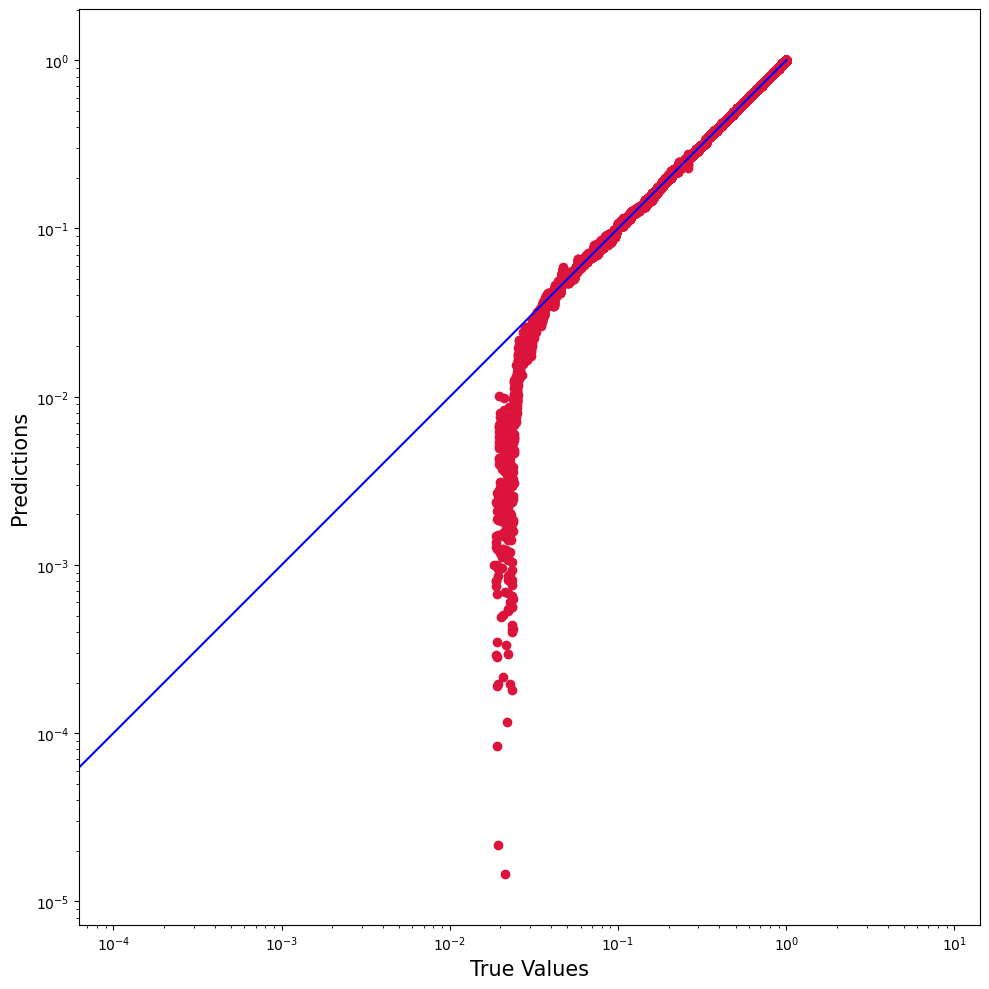

In [92]:
plt.figure(figsize=(10,10))
plt.scatter(_test_out, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(_test_out))
p2 = min(min(y_pred), min(_test_out))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Model 2:


###### LSTMs and Sequences:
LSTM models need 3 dimentional inputs (number of data rows, sequence_length, number of features). This because we need the LSTM to take a sequence of data (for example 60 mins of data) and from this sequence, we want the LSTM model to predict the RUL. These 3 inputs provide the LSTM model all the information about the tendancies and variations in the data for this period, which gives the LSTM model an idea about the state of the motor. This is a strength of LSTM models. They take a degradation period of the motor and determines how much the motor has degraded (percent of life left or RUL as a percent).

For this RUL model we will take 60 minutes of data (sequence_length = 60). We can take more if we desire, but the more data we take the longer the computation time will be. The quality of the LSTM model's prediction will increase the more data (larger sequence_length) we take in, but the quality of prediction reaches a maximum limit to where it will not improve even if more data is taken in.

In [ ]:
train_data=pd.read_csv('/home/jose/FL_AM_Defect-Detection/DEC_DATA/train_data.csv',index_col=None)
test_data=pd.read_csv('/home/jose/FL_AM_Defect-Detection/DEC_DATA/test_data.csv',index_col=None)



In [ ]:
train_data.head()

# Lets Take a Look to the data!

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.title("Line graph")
plt.plot(range(0,len(train_data['RUL'])),train_data['RUL'], color="red")
plt.title('RUL')


In [ ]:
for i in train_data.columns[1:-1]:

    y=train_data[[i]].values



    x = range(0,len(y))

    plt.title("Line graph")
    plt.plot(x, y, color="red")
    plt.title(str(i))

    plt.show()

In [ ]:
test_data.head()

In [ ]:
def gen_seq(data, seq_length, columns):
    L=[]
    n = data.shape[0]
    for i in range(0, n - seq_length):
        L.append(data[i:i+seq_length][columns].values)
    return(L)


###### Homogeneity of Sequences:
For LSTM models, the sequences should be homogeneous. To accomplish this, we generate the sequences depending on the category/day variable. We split each category to into sequences, and then join them into one array in the cells below (for train and test datasets).

(data, seq_length, columns):

data = train_data[train_data['category'] == id

seq_length = 60

columns = ["s1","s2","s3","s4","s5","s6","cycle"]



In [ ]:
# train_inputs = np.concatenate(np.array([gen_seq(train_data[train_data['category'] == id], 60, ["s1","s2","s3","s4","s5","s6","cycle"])
#                                for id in train_data['category'].unique()]))

train_inputs = np.concatenate(np.array([gen_seq(train_data[train_data['category'] == id], 60, ["s1","s2","s3","s4","s5","s6"])
                               for id in train_data['category'].unique()]))

train_inputs.shape


In [ ]:
# train_out

# train_inputs

# for i in range(len(train_inputs)):
#     x = train_inputs[i]
#     print('%s => %s' % (x))

# test_inputs = np.concatenate(np.array([gen_seq(test_data[test_data['category'] == id], 60, ["s1","s2","s3","s4","s5","s6","cycle"])
#                                for id in test_data['category'].unique()]))

test_inputs = np.concatenate(np.array([gen_seq(test_data[test_data['category'] == id], 60, ["s1","s2","s3","s4","s5","s6"])
                               for id in test_data['category'].unique()]))

test_inputs.shape


In [ ]:
def gen_labels(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length:num_elements]


In [ ]:

train_out = np.concatenate(np.array([gen_labels(train_data[train_data['category'] == id], 60, ["RUL"])
                               for id in train_data['category'].unique()]))

train_out.shape

In [ ]:


test_out = np.concatenate(np.array([gen_labels(test_data[test_data['category'] == id], 60, ["RUL"])
                               for id in test_data['category'].unique()]))

test_out.shape

In [ ]:
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
print(log_dir)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
def scheduler(epoch, lr):
      if epoch < 40:
        lr=0.00001
        return lr
      else:
        lr=0.0001
        return lr #* tf.math.exp(-0.1)
lr = tf.keras.callbacks.LearningRateScheduler(scheduler)

es=EarlyStopping(
    monitor="val_loss",

    patience=10,
    verbose=1,
    mode="auto",
    min_delta=0.0001
)

filepath=path+'/checkpoint/RULDECLSTM/'+"weights-improvement-{epoch:02d}-{val_mae:.2f}.h5"

# fname = os.path.sep.join([filepath,args["weights"],"weights-{epoch:03d}-{val_loss:.4f}.h5"])

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor='val_mae',

    mode='min',
    save_best_only=True, verbose=1)


# # checkpoint_filepath = "./tmp/checkpoint"

#scaler = MinMaxScaler()



%load_ext tensorboard
%reload_ext tensorboard




# # Testing



# out_seq = np.array(y_test)#out_seq.reshape((len(out_seq), 1))
# # horizontally stack columns
# dataset = np.array(X_test)#hstack((in_seq1, in_seq2))

# pd.DataFrame(dataset)




# # shift the target sample by one step
# out_seq = np.insert(out_seq, 0, 0)
# #pre

# out_seq = np.delete(out_seq, -1)
# # define generator
# n_input = SEQUENCE_LENGHT #leght of the sequence timesteps
# testing_generator = TimeseriesGenerator(dataset, out_seq, length=n_input, batch_size=STEPS_PER_BATCH)
# # print each sample
# # for i in range(len(testing_generator)):
# #     x, y = generator[i]
# #     print('%s => %s' % (x, y))











tf.keras.backend.clear_session()

nb_features = train_inputs.shape[2]
sequence_length  = train_inputs.shape[1]
nb_out = train_out.shape[1]

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_shape = (sequence_length, nb_features), return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(nb_out, activation = 'relu')
])

lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 10**-7 * 10**(epoch/3))

model.compile(loss=tf.keras.losses.Huber(), optimizer = tf.keras.optimizers.Adam(lr = 10**-7), metrics =['mse','mae'])

# # self.model
# model = Sequential()

# # hidden layers
# model.add(Dense(40, activation="relu", input_dim=X_train.shape[1],kernel_regularizer=L1L2(l2=0.01,l1=0.01))) #Better
# #GOOD 60

# model.add(Dropout(0.3))


# model.add(Dense(20, activation="relu",kernel_regularizer=L2(l2=0.001)))  #Better
# #GOOD 40
# model.add(Dropout(0.5))

# model.add(Dense(20, activation="linear"))

# # output layer
# model.add(Dense(1, activation="linear"))
# softmax for probability, #values are sigmoid


# Compile the network :
# NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
# NN_model.summary()

# Configure the model and start training
model.compile(loss='huber', optimizer='adam', metrics=['mae'])

model.summary()

# y_train
#50 and 30 -->
# R^2: 0.23383518186689745
# Mean Absolute Error (MAE): 396547.5620496487
# Mean Squared Error (MSE): 306771152615.1718
# Mean Absolute Percentage Error (MAPE): 3.5912102242185946e+17
# Root Mean Squared Error (RMSE): 553869.2558855129
# Explained Variance Score: 0.30378274542758565
# Max Error: 17869119.0
# Mean Squared Log Error: 2.760667782700153
# Median Absolute Error: 279682.8125






In [ ]:
#FAST AI SEE IF TRIANING IMPROVES !
# 1420492
# history = model.fit(train_inputs, train_out, epochs = 20, callbacks = [lr])
history=model.fit(train_inputs,train_out,epochs=30,validation_data= (test_inputs,test_out) ,verbose=1,callbacks=[tensorboard_callback,lr,model_checkpoint_callback,es],)


In [ ]:
### Saving model

model.summary()

# model.save(path+'MLP_REG_RUL_16',save_format='h5')



# loading the saved modelweights-improvement-87-0.16.h
loaded_model = tf.keras.models.load_model('/home/jose/FL_AM_Defect-Detection/checkpoint/RULDECLSTM/weights-improvement-16-0.08.h5')



In [ ]:
_test_inputs=test_inputs[0:]
_test_out=test_out[0:]



y_pred = loaded_model.predict(_test_inputs) ## using the untinted dataset!

print('R^2:', metrics.r2_score(_test_out, y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(_test_out, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(_test_out, y_pred))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(_test_out, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(_test_out, y_pred))) # np.sqrt

print('Explained Variance Score:', metrics.explained_variance_score(_test_out, y_pred))
print('Max Error:', metrics.max_error(_test_out, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(_test_out, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(_test_out, y_pred))

## with n_estimators = 150

# R^2: 0.9991654290573937
# Mean Absolute Error (MAE): 1158.6216816072117
# Mean Squared Error (MSE): 333818221.94037396
# Root Mean Squared Error (RMSE): 18270.692979205083
# Explained Variance Score: 0.9991654316522736
# Max Error: 1998236.0866666667
# Mean Squared Log Error: 0.012717975468372306
# Median Absolute Error: 147.4266666667536

## n_estimators = 10
# R^2: 0.9990822069686238
# Mean Absolute Error (MAE): 1213.5715068447246
# Mean Squared Error (MSE): 367106044.79767376
# Mean Absolute Percentage Error (MAPE): 1.0690696275079867e+17
# Root Mean Squared Error (RMSE): 19160.011607451437
# Explained Variance Score: 0.9990822141398445
# Max Error: 1998818.5
# Mean Squared Log Error: 0.012296657672986336
# Median Absolute Error: 137.60000000009313


In [ ]:

plt.figure(figsize=(10,10))
plt.scatter(_test_out, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(_test_out))
p2 = min(min(y_pred), min(_test_out))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()